#### Dictionary: (this are information I taken from the internet to improve my domain knowledge)

**pfn_ebitda:** The ratio expresses the number of years in which a company, if it used only Gross Operating Margin, would be able to pay off in outstanding loans.

**score_accounting:**  This is a score that measures the customer's financial health based on their accounting data.

**score_identity:** This is a score that measures the customer's identity based on their personal information

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
import os
os.chdir(r"D...Rating Score Competition by Credimi\data-set")

In [3]:
# Upload the train dataset
dataframe = pd.read_csv("train.csv")

In [4]:
# Since the dataset does not appear ready to work, I created a function to fix it

# Fixing columns and rows
def fixing_col_row(df):
    
    # FIXING COLUMNS:
    columns = "sfid|dt_rif|juridical_form|dossier_type|application_source|credimi_industry|region|zone|revenues|pfn_ebitda|pn|ebitda|target|score_accounting|score_identity|score_trend|slope_ebit|slope_fondi|slope_ebitda|slope_fatturato|slope_liquidita|slope_al_accordato_operativo_sistema|slope_al_utilizzo_sistema|slope_al_sconfino_sistema|slope_scad_accordato_operativo_sistema|slope_scad_utilizzo_sistema|slope_scad_sconfino_sistema|slope_rev_accordato_operativo_sistema|slope_rev_utilizzo_sistema|slope_rev_sconfino_sistema|gender"
    sep = columns.split("|")

    i = 1
    while i < len(sep):
        support = sep[i]
        df.insert(i, support, np.nan)
        i += 1

    # First column rename
    df.rename(columns = {'sfid|dt_rif|juridical_form|dossier_type|application_source|credimi_industry|region|zone|revenues|pfn_ebitda|pn|ebitda|target|score_accounting|score_identity|score_trend|slope_ebit|slope_fondi|slope_ebitda|slope_fatturato|slope_liquidita|slope_al_accordato_operativo_sistema|slope_al_utilizzo_sistema|slope_al_sconfino_sistema|slope_scad_accordato_operativo_sistema|slope_scad_utilizzo_sistema|slope_scad_sconfino_sistema|slope_rev_accordato_operativo_sistema|slope_rev_utilizzo_sistema|slope_rev_sconfino_sistema|gender': 'sfid'}, inplace = True)
    #
    #
    #
    #
    
    # FIXING ROWS:
    sep2 = df.iloc[0, 0].split("|")
    i = 0
    j = 1
    while i < len(df):
        sep2 = df.iloc[i, 0].split("|")
        while j < len(df.columns):
            if sep2[j] != '':
                df.iloc[i, j] = sep2[j]
                j += 1
            else:
                df.iloc[i, j] = np.nan
                j += 1
        df.iloc[i, 0] = sep2[0]
        i += 1
        j = 1
    

    return df

In [5]:
dataframe2 = dataframe.copy()

In [6]:
# Applying the function:
dataframe2 = fixing_col_row(dataframe2)

In [7]:
# Showing all columns as default
pd.set_option('display.max_columns', 100)

In [8]:
# Target is the target feature
dataframe2

sfid      dt_rif juridical_form dossier_type  \
0     a1Q7R00000eiXcbUAE  2021-10-07             SN            F   
1     a1Q2X00000ZARoVUAX  2020-03-24             RS            S   
2     a1Q7R00000ZWIfjUAH  2020-11-05             SR            F   
3     a1Q2X00000ZEZZlUAP  2020-05-18             SR            F   
4     a1Q7R00000eiTipUAE  2021-09-24             SR            F   
...                  ...         ...            ...          ...   
7515  a1Q7R00000ZWW26UAH  2021-02-18             SR            F   
7516  a1Q7R00000a38AQUAY  2021-06-25             DI            C   
7517  a1Q7R00000eiSLfUAM  2021-09-21             SR            F   
7518  a1Q2X00000ZEY6NUAX  2020-07-01             SN            L   
7519  a1Q2X00000ZEaeHUAT  2020-05-20             DI            L   

     application_source    credimi_industry          region zone revenues  \
0                     D  FOOD_AND_BEVERAGES         LIGURIA  N-W      NaN   
1                     D            SERVICES           LAZIO    C    132.0   
2                     D        CONSTRUCTION           LAZIO    C      NaN   
3                     D           MECHANICS          VENETO  N-E   3913.0   
4                     D         AGRICOLTURE       LOMBARDIA  N-W   1066.0   
...                 ...                 ...             ...  ...      ...   
7515                  D         AGRICOLTURE          MOLISE    S    521.0   
7516                  D            SERVICES        CAMPANIA    S      NaN   
7517                  D           MECHANICS  EMILIA-ROMAGNA  N-E   2381.0   
7518                  P        DISTRIBUTION         LIGURIA  N-W      NaN   
7519                  P        CONSTRUCTION        PIEMONTE  N-W      NaN   

     pfn_ebitda     pn ebitda target      score_accounting  \
0           NaN    NaN    NaN    0.0  -0.16153779354770337   
1        -1.667   54.0   63.0    0.0   -2.7461303460584143   
2           NaN    NaN    NaN    1.0  -0.16153779354770337   
3        0.4693  297.0  179.0    0.0   -1.7794923996594032   
4         1.503  478.0  181.0    0.0   -1.1337077037311243   
...         ...    ...    ...    ...                   ...   
7515      -3.37  111.0   54.0    0.0   -1.1668039778172212   
7516        NaN    NaN    NaN    0.0  -0.16153779354770337   
7517      2.555  123.0  128.0    0.0   -7.8153587352425715   
7518        NaN    NaN    NaN    0.0  -0.16153779354770337   
7519        NaN    NaN    NaN    0.0  -0.16153779354770337   

           score_identity          score_trend          slope_ebit  \
0            -0.590619423                 -0.8  20.612501519342317   
1            -0.430867051                  0.1   6.189476189165828   
2            -0.789302556                  0.1    24.6691136735018   
3            -2.654801803                 -3.0                53.5   
4            -2.655170263  0.30000000000000004  -2.027899248361308   
...                   ...                  ...                 ...   
7515         -1.587450211                 -3.0               -82.0   
7516  -0.1703697609999999                  0.1   9.724407709908089   
7517         -2.808864583                -0.78                 1.5   
7518         -0.978281652                  0.1  1.4984267154161337   
7519         -1.588289526                  0.1  15.003884933778107   

              slope_fondi           slope_ebitda     slope_fatturato  \
0      0.7159832566272675    -1.3552612653855656  133.80754529527533   
1     -16.101875829011433      4.337415842802404  149.37539321544494   
2      -5.456726044257157      18.74114205952864  157.93838547305393   
3                     0.0                   53.5                85.5   
4     -3.4470485771216035     -2.012892537866257  161.87990263176596   
...                   ...                    ...                 ...   
7515                 -1.0                  -77.5              -880.0   
7516  -2.3311571370038124       5.45891529167945  154.96072060029212   
7517                 -2.5                   

### Data Cleaning and Preparation


In [9]:
# Here I created a function to clean the data types
def data_types_cleaning(df):
    df.revenues = df.revenues.astype(float).round(3)
    df.pfn_ebitda = df.pfn_ebitda.astype(float).round(3)
    df.pn = df.pn.astype(float).round(3)
    df.ebitda = df.ebitda.astype(float).round(3)
    df.target = df.target.astype(float).round(3)
    df.score_accounting = df.score_accounting.astype(float).round(3)
    df.score_identity = df.score_identity.astype(float).round(3)
    df.score_trend = df.score_trend.astype(float).round(3)
    df.slope_ebit = df.slope_ebit.astype(float).round(3)
    df.slope_fondi = df.slope_fondi.astype(float).round(3)
    df.slope_ebitda = df.slope_ebitda.astype(float).round(3)
    df.slope_fatturato = df.slope_fatturato.astype(float).round(3)
    df.slope_liquidita = df.slope_liquidita.astype(float).round(3)
    df.slope_al_accordato_operativo_sistema = df.slope_al_accordato_operativo_sistema.astype(float).round(3)
    df.slope_al_utilizzo_sistema = df.slope_al_utilizzo_sistema.astype(float).round(3)
    df.slope_al_sconfino_sistema = df.slope_al_sconfino_sistema.astype(float).round(3)
    df.slope_scad_accordato_operativo_sistema = df.slope_scad_accordato_operativo_sistema.astype(float).round(3)
    df.slope_scad_utilizzo_sistema = df.slope_scad_utilizzo_sistema.astype(float).round(3)
    df.slope_scad_sconfino_sistema = df.slope_scad_sconfino_sistema.astype(float).round(3)
    df.slope_rev_accordato_operativo_sistema = df.slope_rev_accordato_operativo_sistema.astype(float).round(3)
    df.slope_rev_utilizzo_sistema = df.slope_rev_utilizzo_sistema.astype(float).round(3)
    df.slope_rev_sconfino_sistema = df.slope_rev_sconfino_sistema.astype(float).round(3)

    return df 

In [10]:
dataframe3 = dataframe2.copy()

In [11]:
# Applying the function
dataframe3 = data_types_cleaning(dataframe3)

In [12]:
dataframe3.dtypes

sfid                                       object
dt_rif                                     object
juridical_form                             object
dossier_type                               object
application_source                         object
credimi_industry                           object
region                                     object
zone                                       object
revenues                                  float64
pfn_ebitda                                float64
pn                                        float64
ebitda                                    float64
target                                    float64
score_accounting                          float64
score_identity                            float64
score_trend                               float64
slope_ebit                                float64
slope_fondi                               float64
slope_ebitda                              float64
slope_fatturato                           float64


### Training, Validation and Test set

In [13]:
# Here I check whether or not the data are unbalanced. There's a 85-15 proportion
dataframe3.target.value_counts()/len(dataframe3)

0.0    0.851862
1.0    0.148138
Name: target, dtype: float64

In [14]:
# Here I perform a train, validation and test set split
# Why does so "early"? Because I want to avoid the snooping bias.
from sklearn.model_selection import train_test_split

X = dataframe3.drop(columns="target")
y = dataframe3["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.17, random_state = 0,
                                                    stratify = y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state = 0,
                                                  stratify = y_train)

In [15]:
# Check the stratification:
print("y_train class proportions:\n", y_train.value_counts()/len(y_train))
print("\ny_val class proportions:\n", y_val.value_counts()/len(y_val))
print("\ny_test class proportions:\n", y_test.value_counts()/len(y_test))

y_train class proportions:
 0.0    0.85181
1.0    0.14819
Name: target, dtype: float64

y_val class proportions:
 0.0    0.851654
1.0    0.148346
Name: target, dtype: float64

y_test class proportions:
 0.0    0.852228
1.0    0.147772
Name: target, dtype: float64


In [16]:
X_train2 = X_train.copy()

### Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2054d7cdab0>,
 'caps': [<matplotlib.lines.Line2D at 0x2054d7cdff0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2054d7cd810>],
 'medians': [<matplotlib.lines.Line2D at 0x2054d7ce530>],
 'fliers': [<matplotlib.lines.Line2D at 0x2054d7ce7d0>],
 'means': []}

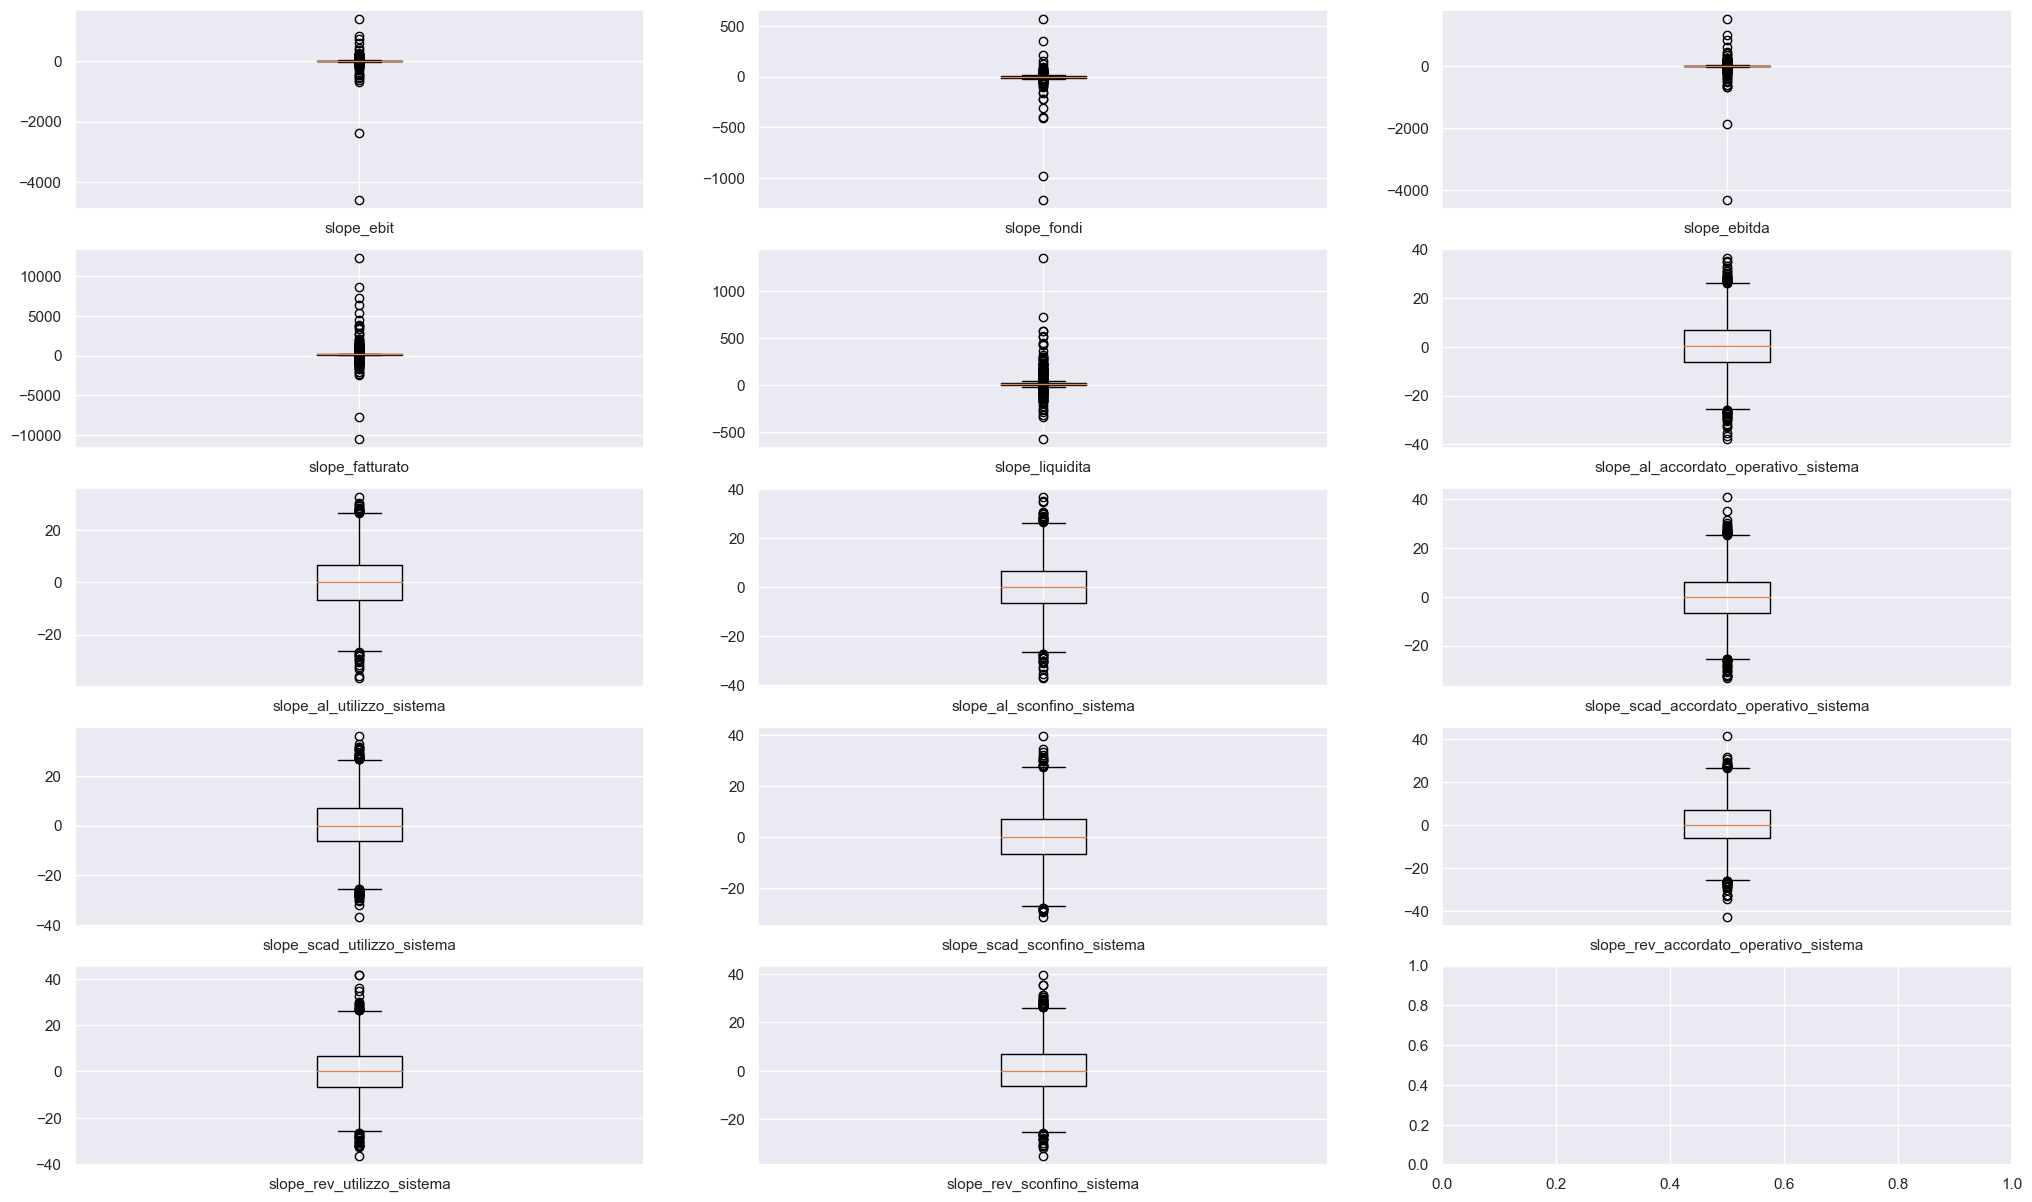

In [26]:
# Boxplots are generally considered a good vary to check outliers
fig, axs = plt.subplots(nrows = 5, ncols = 3, figsize = (25, 15))


axs[0, 0].boxplot(x = X_train2['slope_ebit'], labels = ['slope_ebit'])
axs[0, 1].boxplot(x = X_train2['slope_fondi'], labels = ['slope_fondi'])
axs[0, 2].boxplot(x = X_train2['slope_ebitda'], labels = ['slope_ebitda'])
axs[1, 0].boxplot(x = X_train2['slope_fatturato'], labels = ['slope_fatturato'])
axs[1, 1].boxplot(x = X_train2['slope_liquidita'], labels = ['slope_liquidita'])
axs[1, 2].boxplot(x = X_train2['slope_al_accordato_operativo_sistema'], labels = ['slope_al_accordato_operativo_sistema'])

axs[2, 0].boxplot(x = X_train2['slope_al_utilizzo_sistema'], labels = ['slope_al_utilizzo_sistema'])
axs[2, 1].boxplot(x = X_train2['slope_al_sconfino_sistema'], labels = ['slope_al_sconfino_sistema'])
axs[2, 2].boxplot(x = X_train2['slope_scad_accordato_operativo_sistema'], labels = ['slope_scad_accordato_operativo_sistema'])

axs[3, 0].boxplot(x = X_train2['slope_scad_utilizzo_sistema'], labels = ['slope_scad_utilizzo_sistema'])
axs[3, 1].boxplot(x = X_train2['slope_scad_sconfino_sistema'], labels = ['slope_scad_sconfino_sistema'])
axs[3, 2].boxplot(x = X_train2['slope_rev_accordato_operativo_sistema'], labels = ['slope_rev_accordato_operativo_sistema'])

axs[4, 0].boxplot(x = X_train2['slope_rev_utilizzo_sistema'], labels = ['slope_rev_utilizzo_sistema'])
axs[4, 1].boxplot(x = X_train2['slope_rev_sconfino_sistema'], labels = ['slope_rev_sconfino_sistema'])

The features with the more prominent outliers are:
- slope_ebit
- slope_fondi
- slope_ebitda
- slope_liquidita

I try to delete outliers for the four slope-feature above. (z_score > 3)

array([[<AxesSubplot: title={'center': 'revenues'}>,
        <AxesSubplot: title={'center': 'pfn_ebitda'}>,
        <AxesSubplot: title={'center': 'pn'}>,
        <AxesSubplot: title={'center': 'ebitda'}>,
        <AxesSubplot: title={'center': 'score_accounting'}>],
       [<AxesSubplot: title={'center': 'score_identity'}>,
        <AxesSubplot: title={'center': 'score_trend'}>,
        <AxesSubplot: title={'center': 'slope_ebit'}>,
        <AxesSubplot: title={'center': 'slope_fondi'}>,
        <AxesSubplot: title={'center': 'slope_ebitda'}>],
       [<AxesSubplot: title={'center': 'slope_fatturato'}>,
        <AxesSubplot: title={'center': 'slope_liquidita'}>,
        <AxesSubplot: title={'center': 'slope_al_accordato_operativo_sistema'}>,
        <AxesSubplot: title={'center': 'slope_al_utilizzo_sistema'}>,
        <AxesSubplot: title={'center': 'slope_al_sconfino_sistema'}>],
       [<AxesSubplot: title={'center': 'slope_scad_accordato_operativo_sistema'}>,
        <AxesSubplot: t

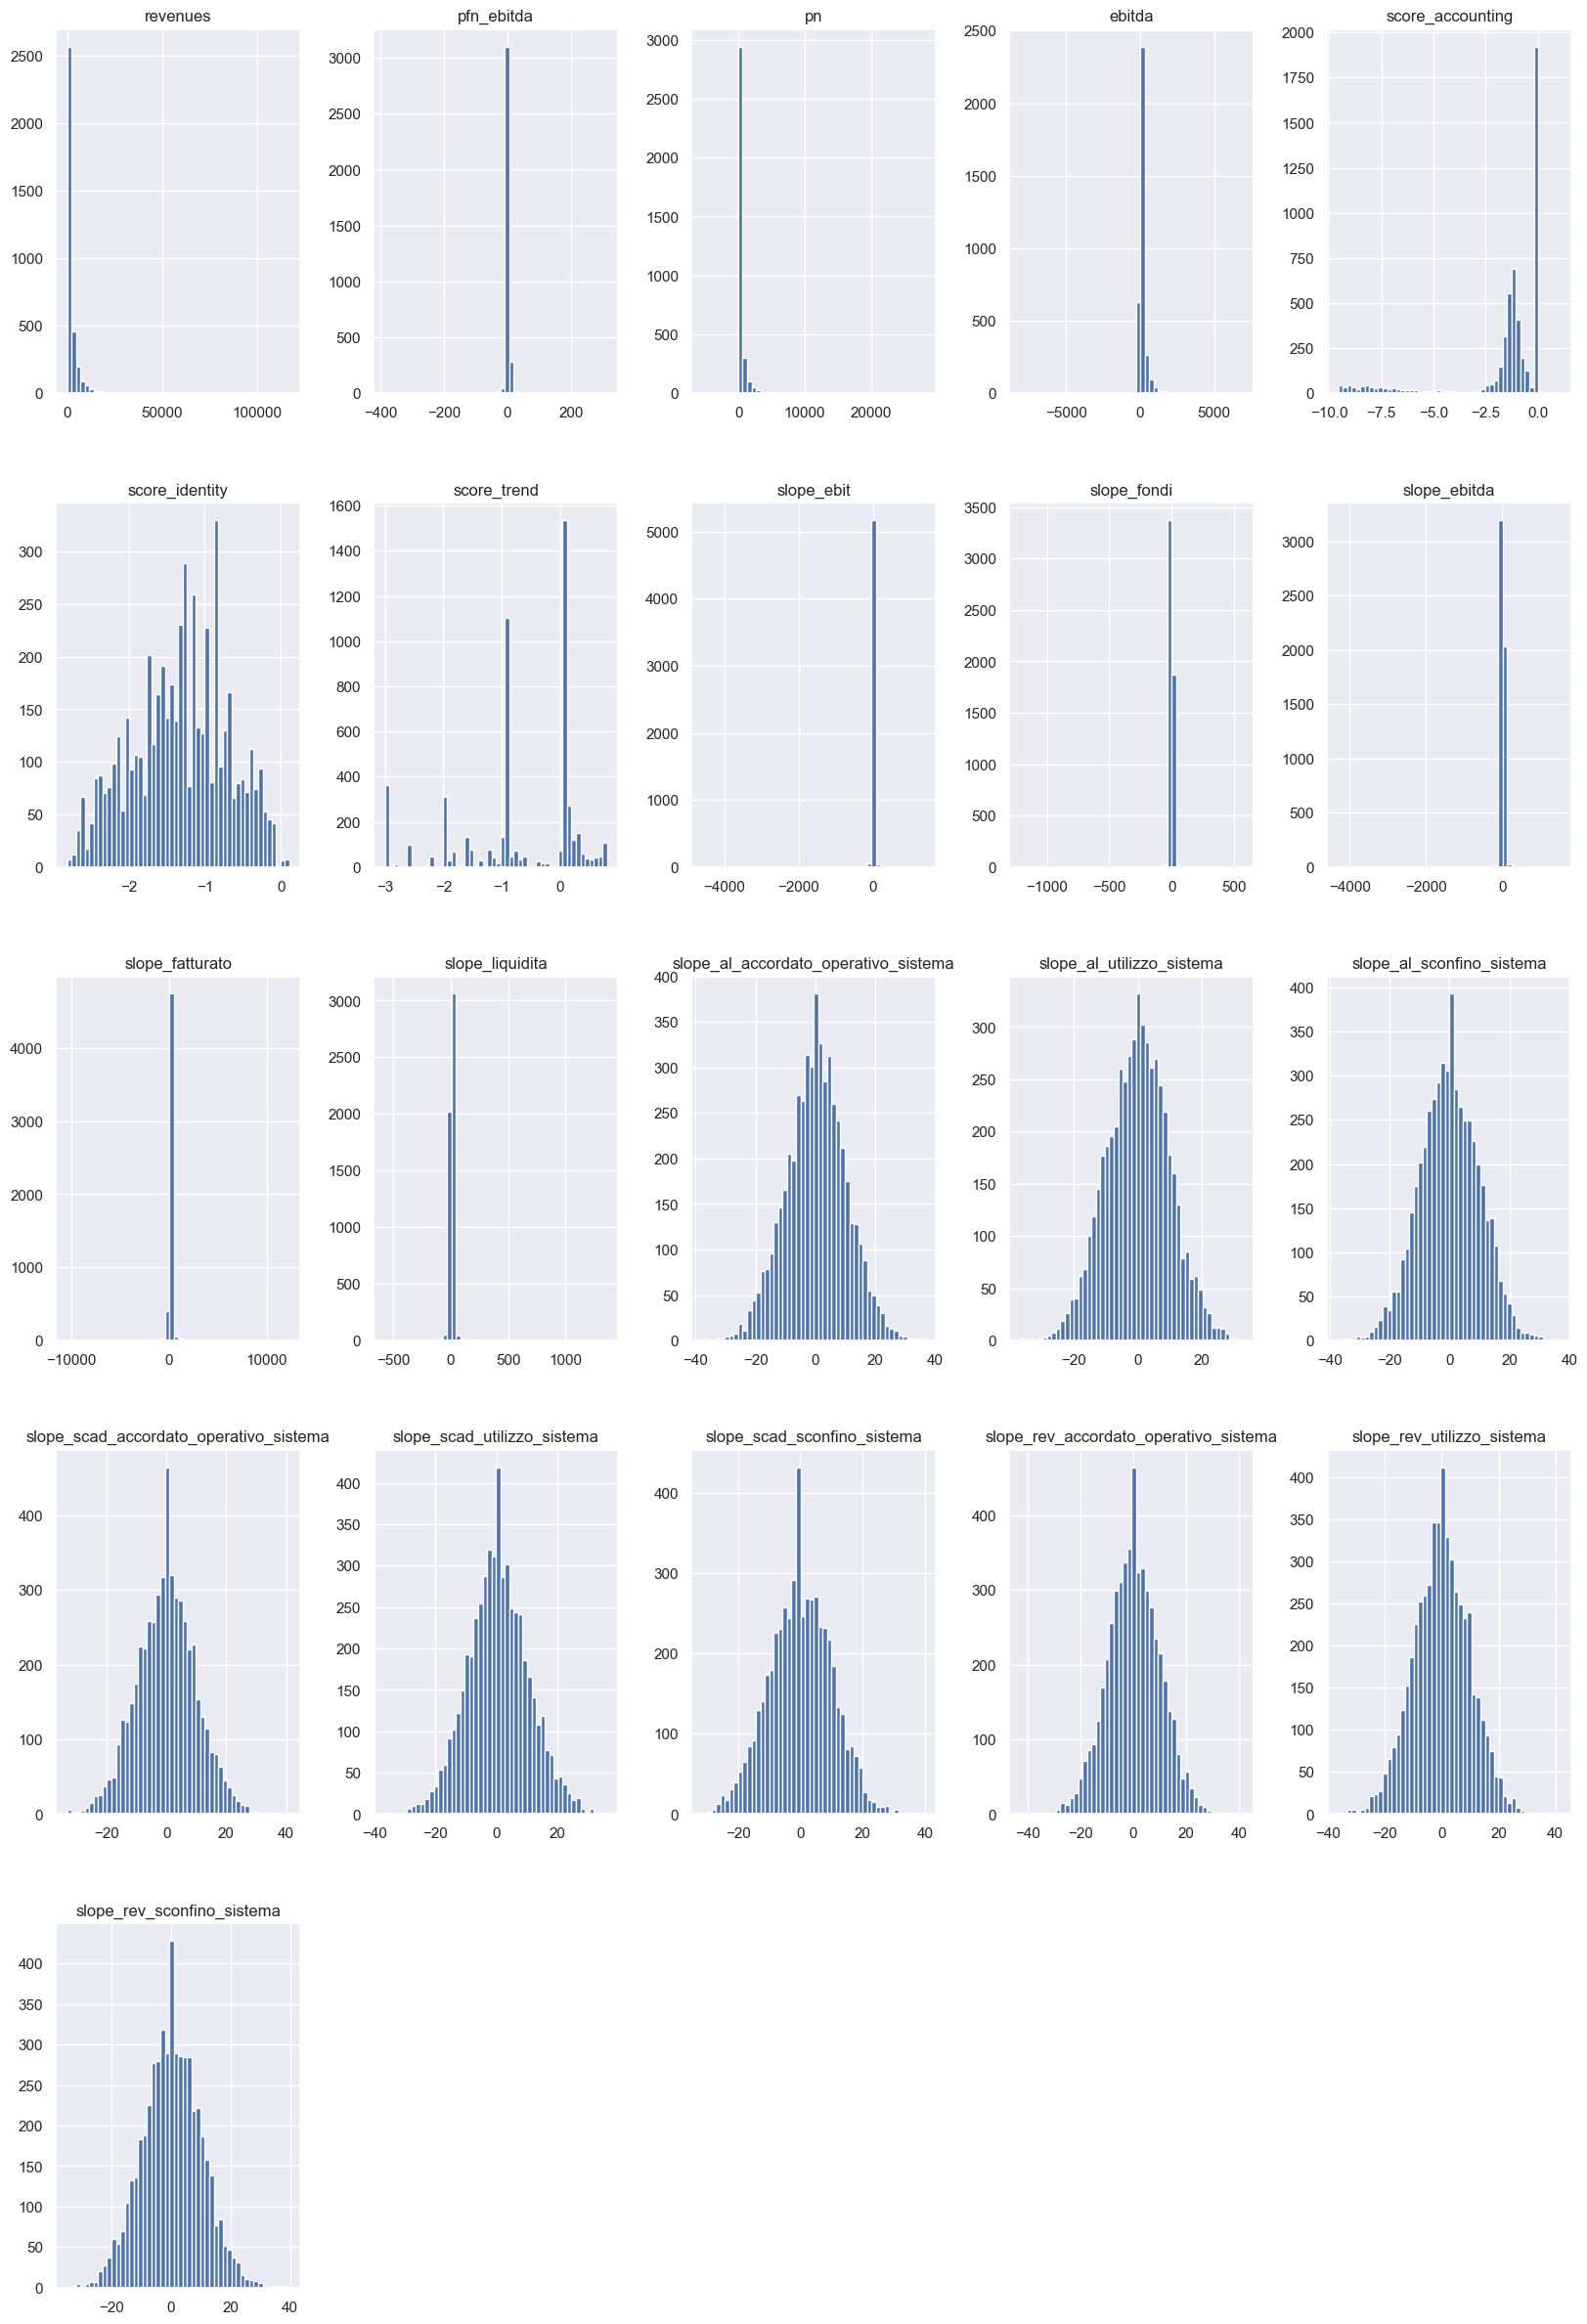

In [27]:
# Here a check the distribution of the data
X_train2.hist(figsize=(20, 30), bins = 50)

In [17]:
X_train2.describe().round(3)

revenues  pfn_ebitda         pn    ebitda  score_accounting  \
count    3489.000    3485.000   3489.000  3489.000          5299.000   
mean     2520.780       0.569    406.174   163.213            -1.617   
std      5406.168      11.238   1066.025   366.479             2.307   
min         0.000    -386.300  -5436.000 -8084.000            -9.560   
25%       426.000      -0.830     46.000    29.000            -1.478   
50%      1033.000      -0.099    120.000    68.000            -1.027   
75%      2493.000       1.586    357.000   170.000            -0.162   
max    117000.000     313.500  28170.000  6926.000             1.086   

       score_identity  score_trend  slope_ebit  slope_fondi  slope_ebitda  \
count        5299.000     5299.000    5304.000     5304.000      5304.000   
mean           -1.325       -0.690       4.218       -4.823         5.336   
std             0.622        1.008      81.455       27.831        78.810   
min            -2.809       -3.000   -4579.000    -1212.000     -4299.000   
25%            -1.748       -1.000      -2.052      -10.440        -1.500   
50%            -1.283       -0.750       4.500       -3.883         5.812   
75%            -0.866        0.100      12.256        0.931        13.614   
max             0.110        0.800    1391.500      569.000      1522.500   

       slope_fatturato  slope_liquidita  slope_al_accordato_operativo_sistema  \
count         5304.000         5304.000                              5304.000   
mean           137.606           12.264                                 0.192   
std            381.855           39.585                                10.001   
min         -10465.000         -572.000                               -37.639   
25%            131.688            2.858                                -6.218   
50%            141.165           10.770                                 0.191   
75%            149.564           18.580                                 6.736   
max          12325.000         1361.000                                36.497   

       slope_al_utilizzo_sistema  slope_al_sconfino_sistema  \
count                   5304.000                   5304.000   
mean                      -0.026                      0.007   
std                        9.807                      9.846   
min                      -36.476                    -37.075   
25%                       -6.680                     -6.590   
50%                        0.073                      0.000   
75%                        6.554                      6.744   
max                       32.615                     37.061   

       slope_scad_accordato_operativo_sistema  slope_scad_utilizzo_sistema  \
count                                5304.000                     5304.000   
mean                                   -0.052                        0.500   
std                                     9.786                        9.962   
min                                   -33.163                      -36.637   
25%                                    -6.512                       -6.018   
50%                                    -0.012                        0.032   
75%                                     6.230                        7.035   
max                                    41.043                       36.244   

       slope_scad_sconfino_sistema  slope_rev_accordato_operativo_sistema  \
count                     5304.000                               5304.000   
mean                        -0.024                                  0.195   
std                          9.999                                  9.858   
min                        -31.276                                -42.767   
25%                         -6.797                                 -6.288   
50%                          0.000                                  0.000   
75%                          6.917                                  6.832   
max                         39.881               

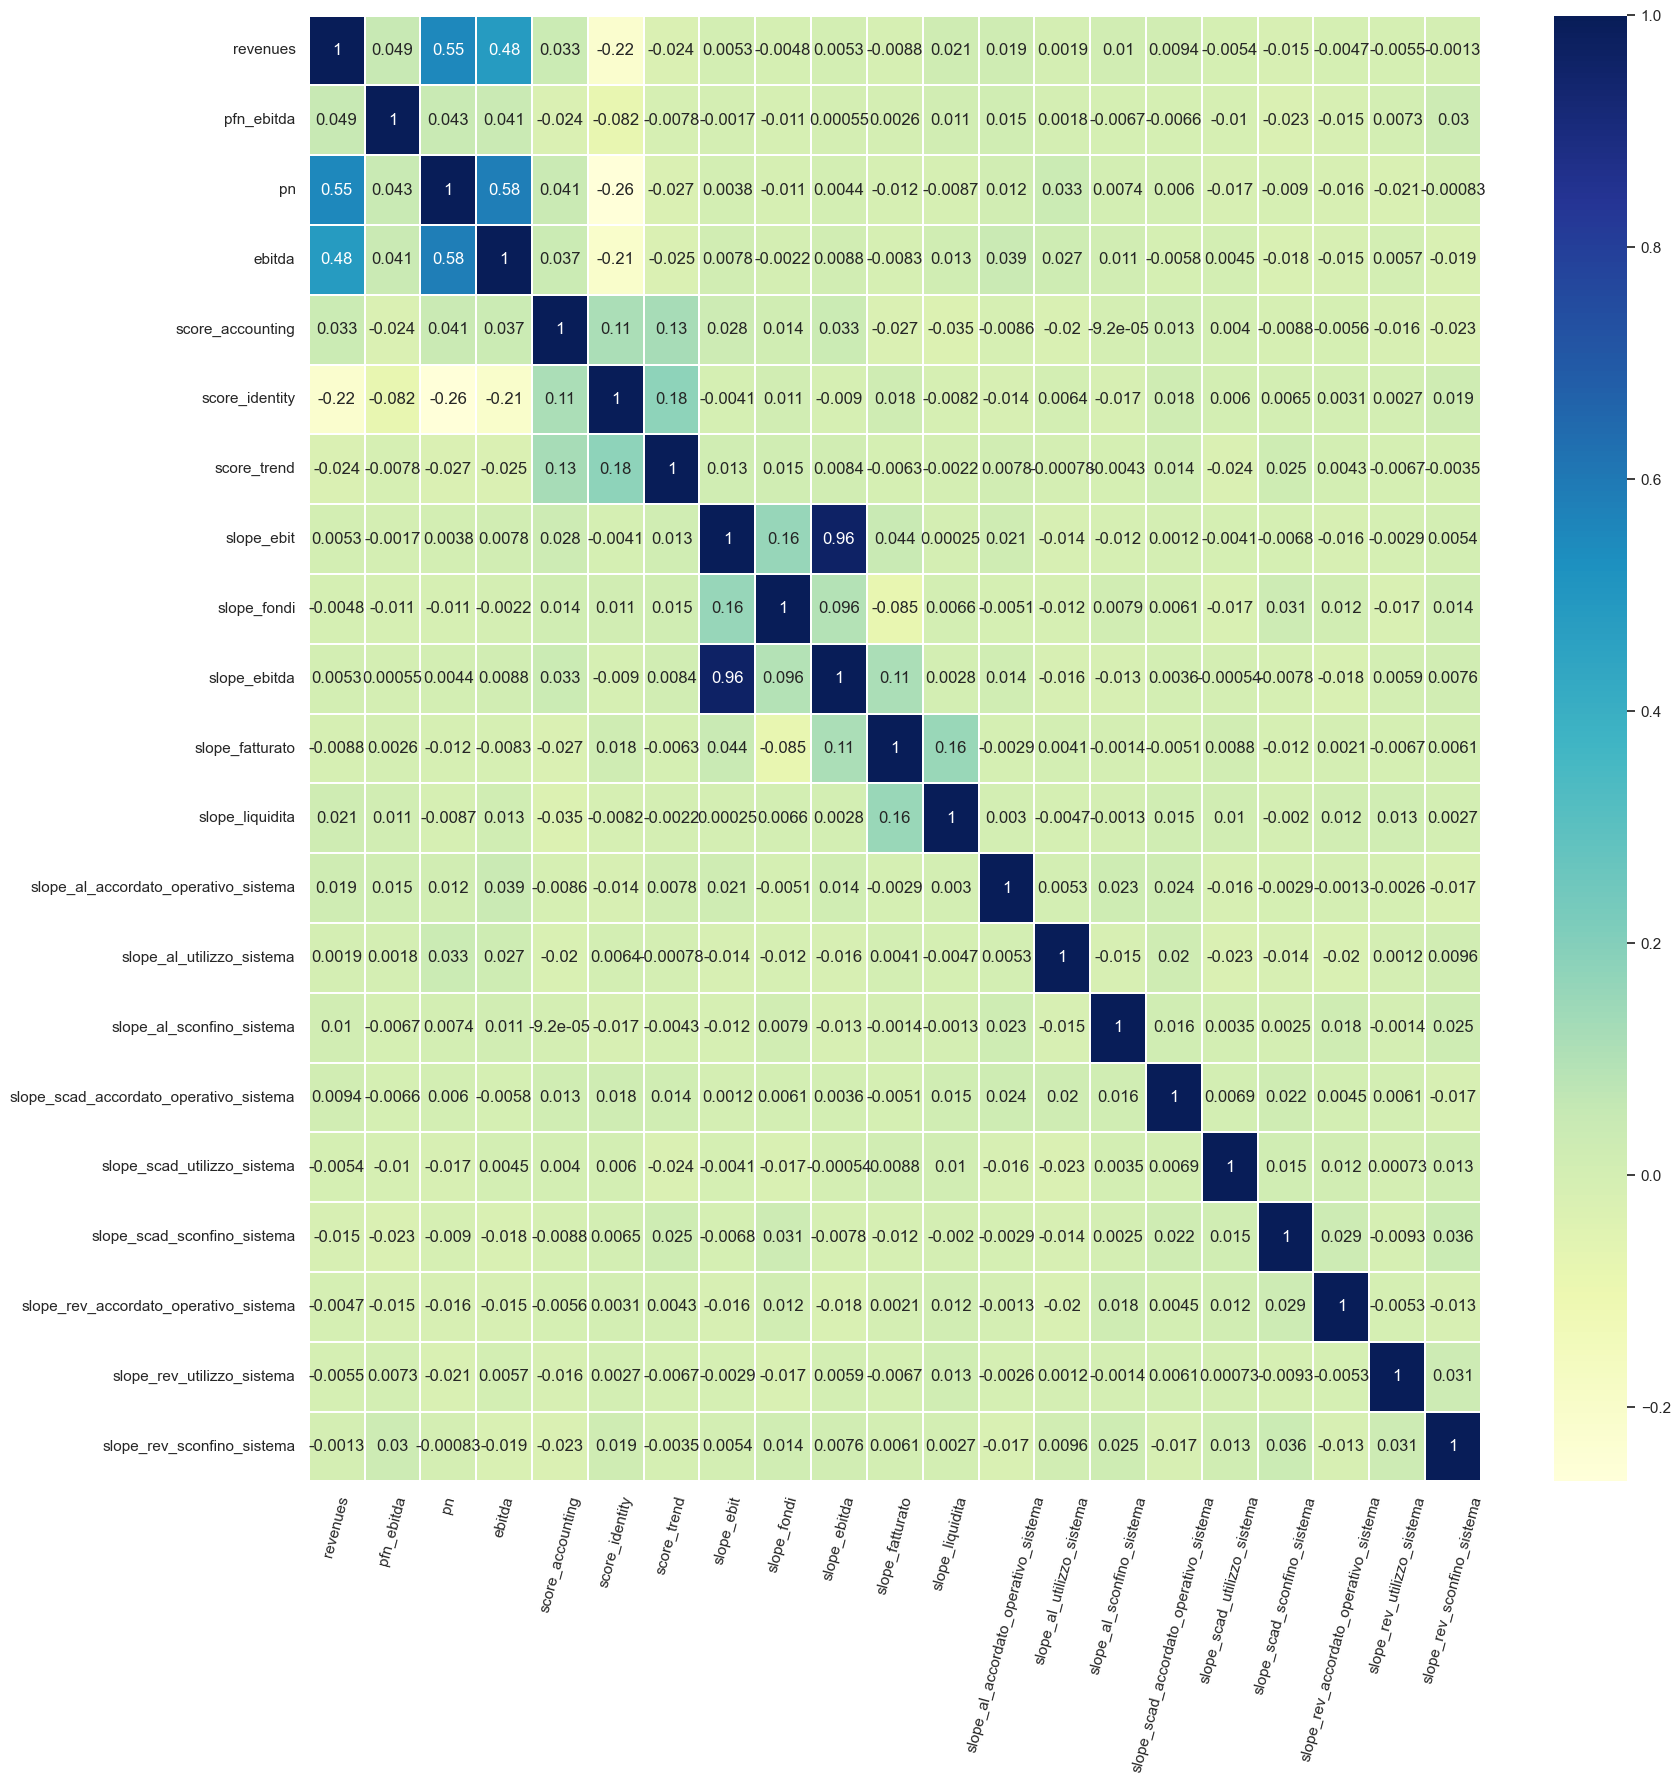

In [29]:
# Correlation matrix
corr_matrix = X_train2.corr(numeric_only = True)

plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot = True, linewidths = 0.1, cmap = "YlGnBu")

plt.xticks(rotation = 75)

plt.tight_layout()
plt.show()

Since I want to avoid multicollinearity, I will delete:
- "revenues"
- "pn"
- "slope_ebitda"

While for now I will keep "score_trend" (-0.22 and 0.18). Why does "score_trend" and not "score_indentity"? Because "score_trend" is not Gaussian, while "score_identity" is.

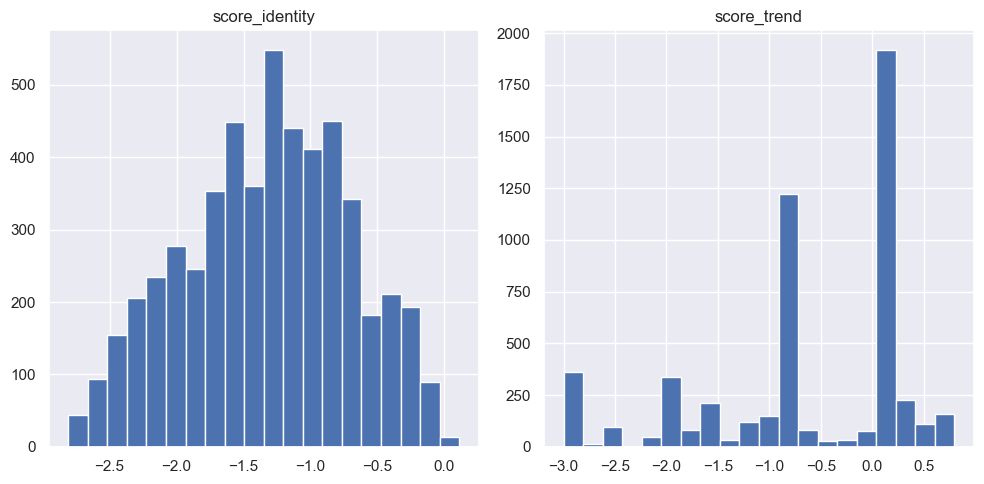

In [28]:
# A subplot of these two features
plt.figure(figsize=(10, 5))

# First histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.hist(X_train2.score_identity, bins = 20)
plt.title('score_identity')

# Second histogram
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.hist(X_train2.score_trend, bins = 20)
plt.title('score_trend')

plt.tight_layout()
plt.show()


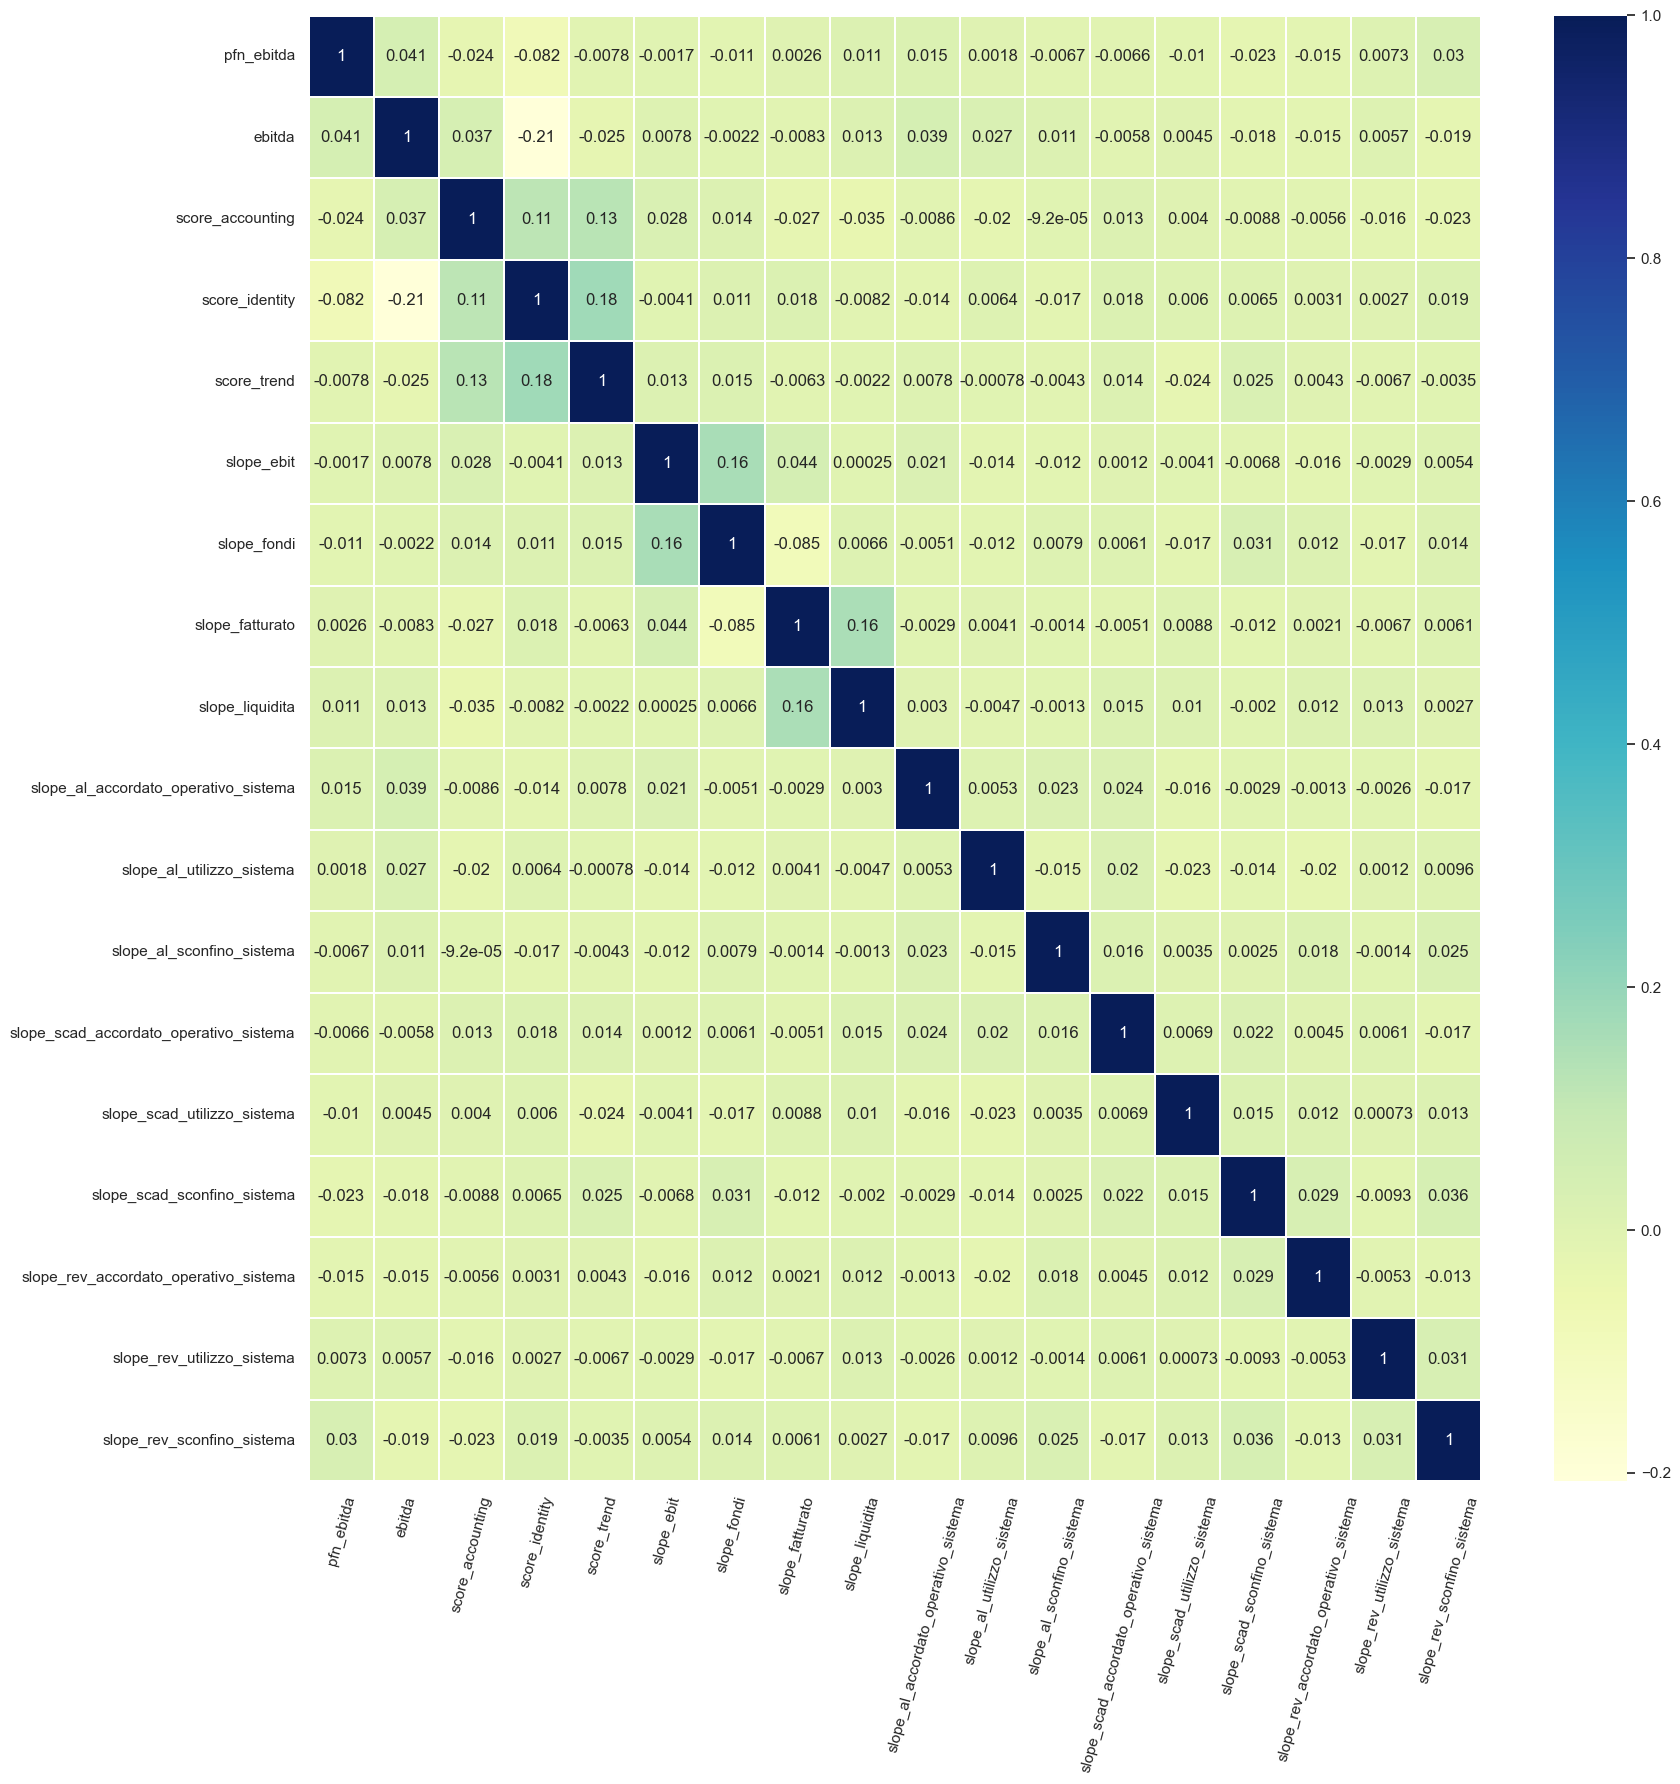

In [19]:
# Checking the changes
corr_matrix = X_train2.drop(columns = ["revenues", "pn", "slope_ebitda"]).corr(numeric_only = True)

plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot = True, linewidths = 0.1, cmap = "YlGnBu")

plt.xticks(rotation = 75)

plt.tight_layout()
plt.show()

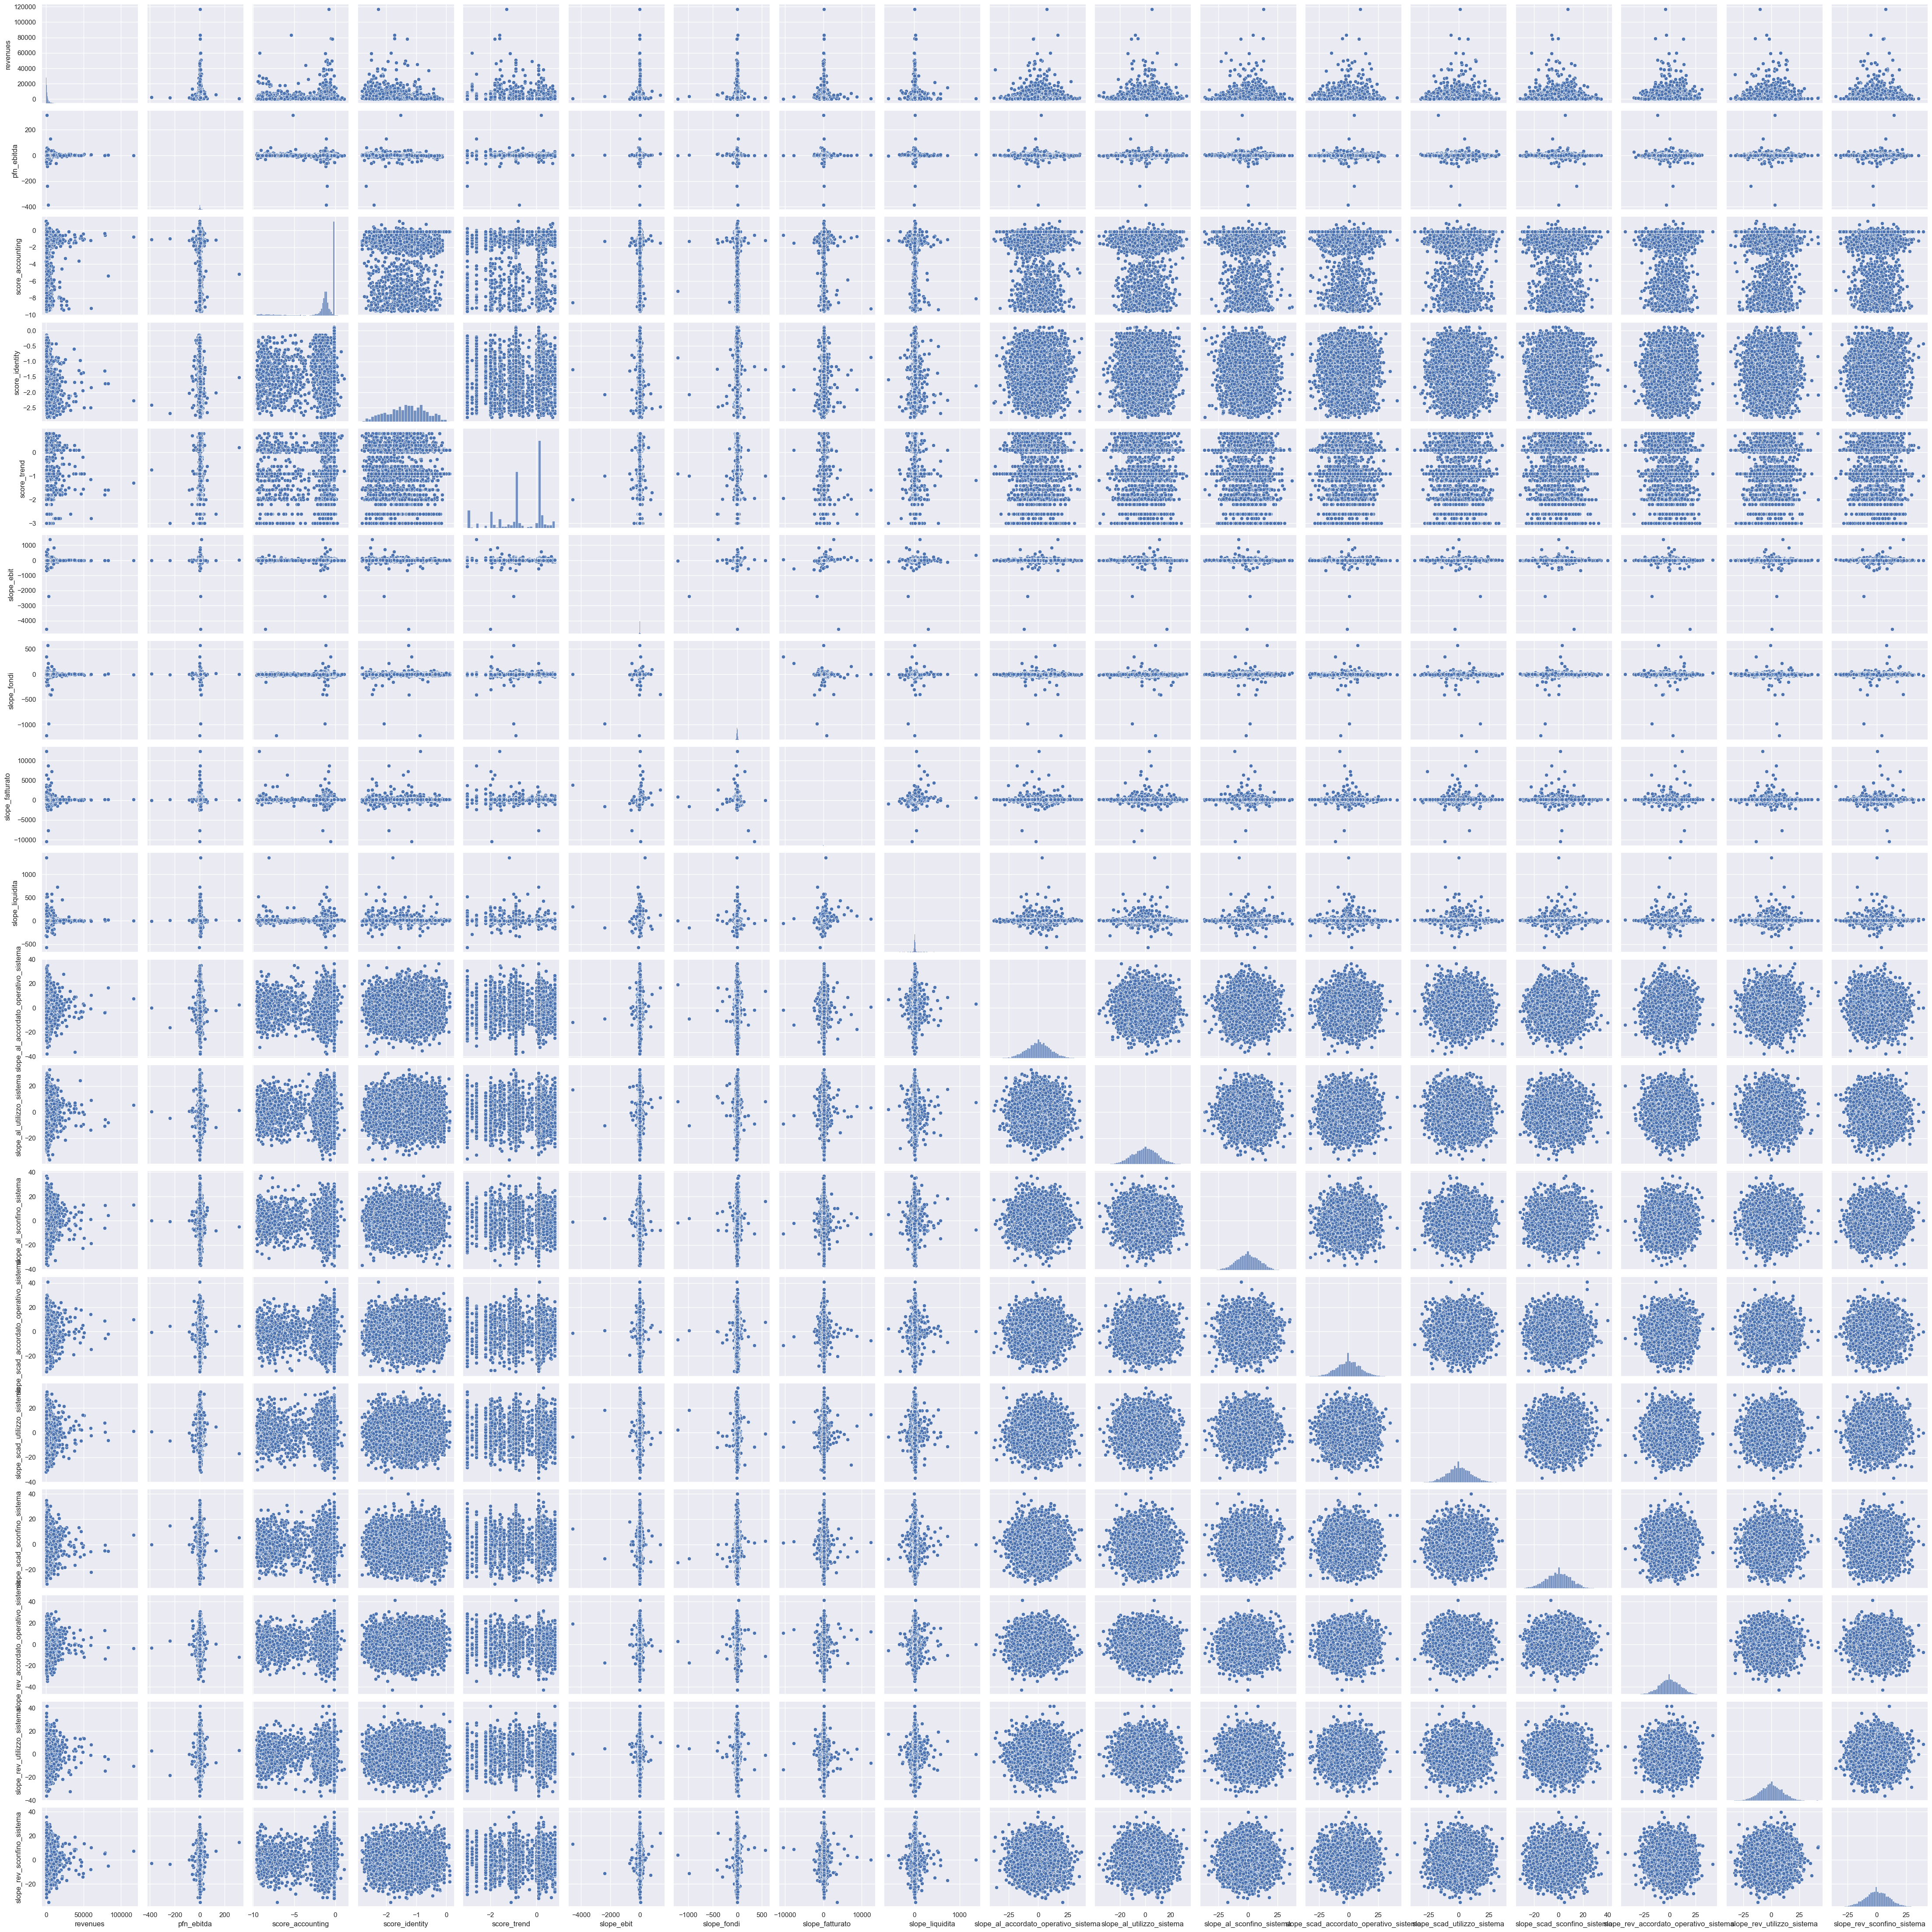

In [34]:
# Checking for non-linear correlations
sns.pairplot(X_train2.drop(columns = ["revenues", "pn", "slope_ebitda"]))

In [18]:
# Is the gender feature balanced?
len(X_train2[X_train2.gender == "M"])/len(X_train2)


# Yes (however, I will test this feature anyway to check if it is able to discriminate for the model)

0.5013197586726998

In [19]:
# Is the distribution among regions balanced?
X_train2.region.value_counts()/len(X_train2)


# No there isn't. Lombardy represents about 16.6% of the Italian population, not 23.6%.
# Same thing for other regions (e.g., Campania, Piedmont, etc.).

LOMBARDIA                0.236237
CAMPANIA                 0.124434
LAZIO                    0.117647
PIEMONTE                 0.110671
VENETO                   0.077866
EMILIA-ROMAGNA           0.064103
PUGLIA                   0.053733
SICILIA                  0.047888
TOSCANA                  0.035445
MARCHE                   0.024133
SARDEGNA                 0.021116
LIGURIA                  0.017345
CALABRIA                 0.015271
ABRUZZO                  0.015271
UMBRIA                   0.009427
FRIULI-VENEZIA GIULIA    0.009238
TRENTINO-ALTO ADIGE      0.006976
BASILICATA               0.005845
MOLISE                   0.005090
VALLE D'AOSTA            0.002262
Name: region, dtype: float64

In [20]:
# A summary
X_train2.zone.value_counts()/len(X_train2)

# More than 50% of the clients of Credimy are in the North part of Italy, according to this data.
# However, for now I will keep (and transform with a function) just zones.

N-W    0.366516
S      0.219646
C      0.186652
N-E    0.158183
I      0.069005
Name: zone, dtype: float64

## Feature selection, Preprocessing & Imputation

In [21]:
# CLipping "score_accounting" and "score_trend" features.
# I do this since ML algorithm does not perform well when there are many rare values.
# A good feature shoul appear more than 5 or so times in the data. Doing so enables a model to
# learn how this feature values relates to the label. (source: Google ML crush course)
def clipping_values(df):
    df.loc[(df.score_accounting >= -10) & (df.score_accounting <= -6), 'score_accounting'] = -8
    df.loc[(df.score_accounting >= -6) & (df.score_accounting <= -4), 'score_accounting'] = -5

    # Identify the elements within the range and set them to the new value
    df.loc[(df.score_trend >= -3) & (df.score_trend <= -2.5), 'score_trend'] = -2.8
    df.loc[(df.score_trend >= -2.5) & (df.score_trend <= -1.5), 'score_trend'] = -1.8
    df.loc[(df.score_trend >= -1.5) & (df.score_trend <= -0.5), 'score_trend'] = -0.9
    df.loc[(df.score_trend >= -0.5) & (df.score_trend <= 0.5), 'score_trend'] = 0.2
    df.loc[(df.score_trend >= 0.5), 'score_trend'] = 0.7

    return df

In [22]:
# Here I perform a preparation based on the Pearson correlation coefficient
# It represents a good metric for this since I even checked for non-linear
# relationships (with the pairplot), and I didn't find them.
def full_preparation(df):
    
    # Feature selection
    df = df.drop(columns = ["revenues", "pn", "slope_ebitda", "sfid", "dt_rif",
                            "application_source", "region"
                            ])
    
    # Fixing some variables
    df.score_accounting.clip(lower = -7.5, inplace = True)
    df.juridical_form = df.juridical_form.map({"SR": "average", "SP": "average", "SL": "average",
                                               "DI": "risky", "AS": "risky", "SU": "risky", "SN": "risky", "RS": "risky", "SV": "risky",
                                               "CO": "coop_&_cons", "SC": "coop_&_cons", "OC": "coop_&_cons", "SO": "coop_&_cons", "CC": "coop_&_cons",
                                               "CO": "other", "AU": "other", "CL": "other", "PS": "other"}, na_action = "ignore")

    # Use the map method to apply the mapping only to the specific values
    # (here I mapped Sardinia and Sicily as "South")
    df.zone = df.zone.map({"I": "S"}, na_action = "ignore").fillna(df.zone)

    # I assign to these two values a new one are too few in the dataset
    df.credimi_industry = df.credimi_industry.map({"PHARMACEUTICAL": "Other", "ENERGY_AND_EXTRACTION": "Other"}, na_action = "ignore").fillna(df.credimi_industry)


    return df

In [23]:
# Now I have to perform an imputation. But, I do not want simply using the median.
# I want to use the median by the type of credimi industry. In this way I will have a
# better approximation, respectively.  
pivot = pd.pivot_table(X_train2, values = ["ebitda", "pfn_ebitda"], index = "credimi_industry", aggfunc = 'median')
def imputation(df):

    # Imputation for pfn_ebitda 
    for index in df[df.pfn_ebitda.isnull()].index:
        if df.loc[index, "credimi_industry"] == "DISTRIBUTION":
            df.loc[index, "pfn_ebitda"] = pivot.loc["DISTRIBUTION", "pfn_ebitda"]

        elif df.loc[index, "credimi_industry"] == "SERVICES":
            df.loc[index, "pfn_ebitda"] = pivot.loc["SERVICES", "pfn_ebitda"]

        elif df.loc[index, "credimi_industry"] == "CONSTRUCTION":
            df.loc[index, "pfn_ebitda"] = pivot.loc["CONSTRUCTION", "pfn_ebitda"]

        elif df.loc[index, "credimi_industry"] == "METALLURGY_AND_STEEL_PRODUCTS":
            df.loc[index, "pfn_ebitda"] = pivot.loc["METALLURGY_AND_STEEL_PRODUCTS", "pfn_ebitda"]
            
        elif df.loc[index, "credimi_industry"] == "TRANSPORTATION_SERVICES":
            df.loc[index, "pfn_ebitda"] = pivot.loc["TRANSPORTATION_SERVICES", "pfn_ebitda"]
        
        elif df.loc[index, "credimi_industry"] == "MECHANICS":
            df.loc[index, "pfn_ebitda"] = pivot.loc["MECHANICS", "pfn_ebitda"]

        elif df.loc[index, "credimi_industry"] == "FASHION":
            df.loc[index, "pfn_ebitda"] = pivot.loc["FASHION", "pfn_ebitda"]
            df.loc[index, "ebitda"] = pivot.loc["FASHION", "ebitda"]

        elif df.loc[index, "credimi_industry"] == "FOOD_AND_BEVERAGES":
            df.loc[index, "pfn_ebitda"] = pivot.loc["FOOD_AND_BEVERAGES", "pfn_ebitda"]

        elif df.loc[index, "credimi_industry"] == "INTERMEDIATE_GOODS_FOR_PRODUCTION":
            df.loc[index, "pfn_ebitda"] = pivot.loc["INTERMEDIATE_GOODS_FOR_PRODUCTION", "pfn_ebitda"]

        elif df.loc[index, "credimi_industry"] == "CHEMISTRY":
            df.loc[index, "pfn_ebitda"] = pivot.loc["CHEMISTRY", "pfn_ebitda"]

        elif df.loc[index, "credimi_industry"] == "PUBLISHING":
            df.loc[index, "pfn_ebitda"] = pivot.loc["PUBLISHING", "pfn_ebitda"]
        
        elif df.loc[index, "credimi_industry"] == "OTHER_CONSUMER_GOODS":
            df.loc[index, "pfn_ebitda"] = pivot.loc["OTHER_CONSUMER_GOODS", "pfn_ebitda"]

        elif df.loc[index, "credimi_industry"] == "CONSUMER_GOODS":
            df.loc[index, "pfn_ebitda"] = pivot.loc["CONSUMER_GOODS", "pfn_ebitda"]

        elif df.loc[index, "credimi_industry"] == "ELECTRONICS_AND_ELECTRICAL_ENGINEERING":
            df.loc[index, "pfn_ebitda"] = pivot.loc["ELECTRONICS_AND_ELECTRICAL_ENGINEERING", "pfn_ebitda"]

        elif df.loc[index, "credimi_industry"] == "FURNITURE":
            df.loc[index, "pfn_ebitda"] = pivot.loc["FURNITURE", "pfn_ebitda"]

        elif df.loc[index, "credimi_industry"] == "AGRICOLTURE":
            df.loc[index, "pfn_ebitda"] = pivot.loc["AGRICOLTURE", "pfn_ebitda"]

        elif df.loc[index, "credimi_industry"] == "FINANCIAL_HOLDINGS":
            df.loc[index, "pfn_ebitda"] = pivot.loc["FINANCIAL_HOLDINGS", "pfn_ebitda"]

        elif df.loc[index, "credimi_industry"] == "TRANSPORTATION_MEANS":
            df.loc[index, "pfn_ebitda"] = pivot.loc["TRANSPORTATION_MEANS", "pfn_ebitda"]
        
        elif df.loc[index, "credimi_industry"] == "HOUSEHOLD_ELECTRICAL_APPLIANCES":
            df.loc[index, "pfn_ebitda"] = pivot.loc["HOUSEHOLD_ELECTRICAL_APPLIANCES", "pfn_ebitda"]

        else:
            df.loc[index, "pfn_ebitda"] = (pivot.loc["PHARMACEUTICAL", "pfn_ebitda"] + pivot.loc["ENERGY_AND_EXTRACTION", "pfn_ebitda"]) / 2           # average mean of the two median values



    # Imputation for pebitda 
    for index in df[df.ebitda.isnull()].index:
        if df.loc[index, "credimi_industry"] == "DISTRIBUTION":
            df.loc[index, "ebitda"] = pivot.loc["DISTRIBUTION", "ebitda"]

        elif df.loc[index, "credimi_industry"] == "SERVICES":
            df.loc[index, "ebitda"] = pivot.loc["SERVICES", "ebitda"]

        elif df.loc[index, "credimi_industry"] == "CONSTRUCTION":
            df.loc[index, "ebitda"] = pivot.loc["CONSTRUCTION", "ebitda"]

        elif df.loc[index, "credimi_industry"] == "METALLURGY_AND_STEEL_PRODUCTS":
            df.loc[index, "ebitda"] = pivot.loc["METALLURGY_AND_STEEL_PRODUCTS", "ebitda"]
            
        elif df.loc[index, "credimi_industry"] == "TRANSPORTATION_SERVICES":
            df.loc[index, "ebitda"] = pivot.loc["TRANSPORTATION_SERVICES", "ebitda"]
        
        elif df.loc[index, "credimi_industry"] == "MECHANICS":
            df.loc[index, "ebitda"] = pivot.loc["MECHANICS", "ebitda"]

        elif df.loc[index, "credimi_industry"] == "FASHION":
            df.loc[index, "ebitda"] = pivot.loc["FASHION", "ebitda"]

        elif df.loc[index, "credimi_industry"] == "FOOD_AND_BEVERAGES":
            df.loc[index, "ebitda"] = pivot.loc["FOOD_AND_BEVERAGES", "ebitda"]

        elif df.loc[index, "credimi_industry"] == "INTERMEDIATE_GOODS_FOR_PRODUCTION":
            df.loc[index, "ebitda"] = pivot.loc["INTERMEDIATE_GOODS_FOR_PRODUCTION", "ebitda"]

        elif df.loc[index, "credimi_industry"] == "CHEMISTRY":
            df.loc[index, "ebitda"] = pivot.loc["CHEMISTRY", "ebitda"]

        elif df.loc[index, "credimi_industry"] == "PUBLISHING":
            df.loc[index, "ebitda"] = pivot.loc["PUBLISHING", "ebitda"]
        
        elif df.loc[index, "credimi_industry"] == "OTHER_CONSUMER_GOODS":
            df.loc[index, "ebitda"] = pivot.loc["OTHER_CONSUMER_GOODS", "ebitda"]

        elif df.loc[index, "credimi_industry"] == "CONSUMER_GOODS":
            df.loc[index, "ebitda"] = pivot.loc["CONSUMER_GOODS", "ebitda"]

        elif df.loc[index, "credimi_industry"] == "ELECTRONICS_AND_ELECTRICAL_ENGINEERING":
            df.loc[index, "ebitda"] = pivot.loc["ELECTRONICS_AND_ELECTRICAL_ENGINEERING", "ebitda"]

        elif df.loc[index, "credimi_industry"] == "FURNITURE":
            df.loc[index, "ebitda"] = pivot.loc["FURNITURE", "ebitda"]

        elif df.loc[index, "credimi_industry"] == "AGRICOLTURE":
            df.loc[index, "ebitda"] = pivot.loc["AGRICOLTURE", "ebitda"]

        elif df.loc[index, "credimi_industry"] == "FINANCIAL_HOLDINGS":
            df.loc[index, "ebitda"] = pivot.loc["FINANCIAL_HOLDINGS", "ebitda"]

        elif df.loc[index, "credimi_industry"] == "TRANSPORTATION_MEANS":
            df.loc[index, "ebitda"] = pivot.loc["TRANSPORTATION_MEANS", "ebitda"]
        
        elif df.loc[index, "credimi_industry"] == "HOUSEHOLD_ELECTRICAL_APPLIANCES":
            df.loc[index, "ebitda"] = pivot.loc["HOUSEHOLD_ELECTRICAL_APPLIANCES", "ebitda"]

        else:
            df.loc[index, "ebitda"] = (pivot.loc["PHARMACEUTICAL", "ebitda"] + pivot.loc["ENERGY_AND_EXTRACTION", "ebitda"]) / 2           # average mean of the two median values



    return df

### Perform the functions + OHE

In [24]:
# Here I apply all the functions I just built.
X_train2 = clipping_values(X_train2)
X_train2 = full_preparation(X_train2)
X_train2 = imputation(X_train2)

# One hot encoding (using pd.get_dummies())
X_train2 = pd.get_dummies(X_train2, columns = ["juridical_form", "dossier_type", "zone", "credimi_industry", "gender"])

In [25]:
#Imputation for score_accounting, score_identity & score_trend
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp_mean.fit(X_train2)
X_train2 = pd.DataFrame(imp_mean.transform(X_train2), columns = X_train2.columns)

In [26]:
# Outliers removing via z_score (I choose to remove the following three features)
from sklearn.impute import SimpleImputer
import scipy.stats as stats

z_score = stats.zscore(X_train2.loc[:, ["slope_ebit", "slope_fondi", "slope_liquidita"]])
data = z_score < 3
X_train2.loc[:, ["slope_ebit", "slope_fondi", "slope_liquidita"]] = X_train2[data]

In [27]:
# Imputation of the NEW null values (generated through the elimination of the outliers)
X_train2 = pd.DataFrame(imp_mean.transform(X_train2), columns = X_train2.columns)

In [28]:
# Here I have choose to put all the function in one
def all_in_one(df, X_DF):
    df = clipping_values(df)
    df = full_preparation(df)

    pivot = pd.pivot_table(X_DF, values = ["ebitda", "pfn_ebitda"], index = "credimi_industry", aggfunc = 'median')
    df = imputation(df)

    # One hot encoding (using pd.get_dummies())
    df = pd.get_dummies(df, columns = ["juridical_form", "dossier_type", "zone", "credimi_industry", "gender"])

    #Imputation for score_accounting, score_identity & score_trend
    from sklearn.impute import SimpleImputer

    imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'median')
    imp_mean.fit(df)
    df = pd.DataFrame(imp_mean.transform(df), columns = df.columns)

    z_score = stats.zscore(df.loc[:, ["slope_ebit", "slope_fondi", "slope_liquidita"]])
    data = z_score < 3
    df.loc[:, ["slope_ebit", "slope_fondi", "slope_liquidita"]] = df[data]

    # Imputation of the new null values (generated through the elimination of the outliers)
    df = pd.DataFrame(imp_mean.transform(df), columns = df.columns)

    return df

In [29]:
X_train2

pfn_ebitda  ebitda  score_accounting  score_identity  score_trend  \
0         0.9620    26.0            -0.587          -1.720          0.2   
1         0.5230   128.0            -1.004          -1.244          0.2   
2         6.6000   155.0            -7.500          -1.318         -1.8   
3        -0.1890   196.0            -0.162          -1.564         -0.9   
4        -0.1645    53.0            -0.162          -1.050          0.2   
...          ...     ...               ...             ...          ...   
5299     -0.1880    61.0            -0.162          -0.958          0.7   
5300     -0.1645    53.0            -0.162          -1.640         -0.9   
5301     -0.1645    53.0            -0.162          -0.847          0.2   
5302     -0.1645    53.0            -0.162          -0.001          0.2   
5303      4.2360   127.0            -1.510          -1.644         -1.8   

      slope_ebit  slope_fondi  slope_fatturato  slope_liquidita  \
0          3.420        1.230          134.629            1.310   
1          8.081       -1.844          158.559           -7.491   
2         -6.500        2.500          -69.000            1.000   
3          4.073       -6.146          148.553           14.407   
4         16.714       -1.463          152.793           -7.263   
...          ...          ...              ...              ...   
5299      28.758       -3.559          142.178           23.449   
5300      12.700       -2.570          153.481            3.090   
5301      -1.547        7.188          144.037           17.848   
5302     -14.791       21.683          141.122           13.465   
5303       4.500       -2.000          195.500            4.500   

      slope_al_accordato_operativo_sistema  slope_al_utilizzo_sistema  \
0                                   13.071                      1.151   
1                                    2.951                     13.760   
2                                    1.238                      1.270   
3                                   -0.166                     -7.091   
4                                    9.614                      5.615   
...                                    ...                        ...   
5299                               -11.294                      8.229   
5300                                27.551                     -6.809   
5301                               -29.510                      0.533   
5302                                20.431                     -4.621   
5303                                21.839                      1.497   

      slope_al_sconfino_sistema  slope_scad_accordato_operativo_sistema  \
0                         1.847                                  -8.238   
1                        -1.896                                  -1.178   
2                         8.005                                   2.856   
3                         9.685                                  -8.552   
4                        15.799                                  -3.059   
...                         ...                                     ...   
5299                     11.956                                  24.569   
5300                    -16.407                                  -3.093   
5301                     16.124                                   0.480   
5302                      7.227                                  -5.162   
5303                      6.345                                   1.285   

      slope_scad_utilizzo_sistema  slope_scad_sconfino_sistema  \
0                           6.459                        6.338   
1                          -9.510                       -7.135   
2                          11.880                       19.582   
3                          -5.684                       -8.219   
4                           2.230                       -6.947   
...                           ...                          ...   
5299                       -1.584                      -19.0

### Algorithm selection

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

forest1 = RandomForestClassifier(random_state = 0)

In [31]:
# Evaluate the performance of the model using 5-fold (stratified) cross-validation
# using all (selected) features
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_res1 = cross_validate(forest1, X_train2, y_train, cv = stratified_kfold,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'])

# Print results
print("MEAN accuracy score:", np.mean(cv_res1['test_accuracy']))
print('MEAN Precision:', np.mean(cv_res1['test_precision']))
print('MEAN Recall:', np.mean(cv_res1['test_recall']))
print('MEAN F1 score:', np.mean(cv_res1['test_f1']))

MEAN accuracy score: 0.9029032774349581
MEAN Precision: 0.8829680430603013
MEAN Recall: 0.3982584858501975
MEAN F1 score: 0.5485147200464503


In [32]:
# Trying to remove score_trend
forest2 = RandomForestClassifier(random_state = 0)

# Evaluate the performance of the model using 5-fold (stratified) cross-validation
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_res2 = cross_validate(forest2, X_train2.drop(columns = ["score_trend"]), y_train,
                         cv = stratified_kfold, scoring = ['accuracy', 'precision', 'recall', 'f1'])

# Print results
print("MEAN accuracy score:", np.mean(cv_res2['test_accuracy']))
print('MEAN Precision:', np.mean(cv_res2['test_precision']))
print('MEAN Recall:', np.mean(cv_res2['test_recall']))
print('MEAN F1 score:', np.mean(cv_res2['test_f1']))


# It actually worsened performance significantly. So I will definitely keep it.

MEAN accuracy score: 0.8851809435740581
MEAN Precision: 0.8828798185941042
MEAN Recall: 0.2595742965411594
MEAN F1 score: 0.40100927640945516


In [33]:
# Through domain knowledge, I try to remove even "slope_rev_utilizzo_sistema", "slope_rev_sconfino_sistema"
forest3 = RandomForestClassifier(random_state = 0)

# Evaluate the performance of the model using 5-fold stratified cross-validation
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_res3 = cross_validate(forest3, X_train2.drop(columns = ["slope_rev_utilizzo_sistema", "slope_rev_sconfino_sistema"]),
                         y_train, cv = stratified_kfold, scoring = ['accuracy', 'precision', 'recall', 'f1'])

# Print results
print("MEAN accuracy score:", np.mean(cv_res3['test_accuracy']))
print('MEAN Precision:', np.mean(cv_res3['test_precision']))
print('MEAN Recall:', np.mean(cv_res3['test_recall']))
print('MEAN F1 score:', np.mean(cv_res3['test_f1']))


# Have slightly increased recall (and so F1 score), but in this analysis I am more focus on precision.
# (and most importantly, at this stage I am of just looking for big variations as above)
# Therefore, I will keep these features.

MEAN accuracy score: 0.9047884694040865
MEAN Precision: 0.8771847368852181
MEAN Recall: 0.41607675562363944
MEAN F1 score: 0.5642776601661412


In [34]:
# Here I decided to test the gender feature
forest4 = RandomForestClassifier(random_state = 0)

# Evaluate the performance of the model using 5-fold stratified cross-validation
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_res4 = cross_validate(forest4, X_train2.drop(columns = ["gender_F", "gender_M"]), y_train,
                         cv = stratified_kfold, scoring = ['accuracy', 'precision', 'recall', 'f1'])

# Print results
print("MEAN accuracy score:", np.mean(cv_res4['test_accuracy']))
print('MEAN Precision:', np.mean(cv_res4['test_precision']))
print('MEAN Recall:', np.mean(cv_res4['test_recall']))
print('MEAN F1 score:', np.mean(cv_res4['test_f1']))


# No statistically significant variations

MEAN accuracy score: 0.9019604147031103
MEAN Precision: 0.8709232899410969
MEAN Recall: 0.3982665484157059
MEAN F1 score: 0.5464673495644317


In [35]:
# Here I decided to test "zone" too.
forest5 = RandomForestClassifier(random_state = 0)

# Evaluate the performance of the model using 5-fold stratified cross-validation
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_res5 = cross_validate(forest5, X_train2.drop(columns = ["zone_C", "zone_N-E", "zone_N-W", "zone_S"]),
                          y_train, cv = stratified_kfold, scoring = ['accuracy', 'precision', 'recall', 'f1'])

# Print results
print("MEAN accuracy score:", np.mean(cv_res5['test_accuracy']))
print('MEAN Precision:', np.mean(cv_res5['test_precision']))
print('MEAN Recall:', np.mean(cv_res5['test_recall']))
print('MEAN F1 score:', np.mean(cv_res5['test_f1']))


# No statistically significant variations

MEAN accuracy score: 0.9046003236533707
MEAN Precision: 0.8842499282084159
MEAN Recall: 0.40972345400306376
MEAN F1 score: 0.5598836363936982


To summarise, at this stage I will keep all features and testing them in a more appropriate way.

In [36]:
X_train2.shape

(5304, 53)

Text(0.5, 1.0, 'Visualizing Feature Importances')

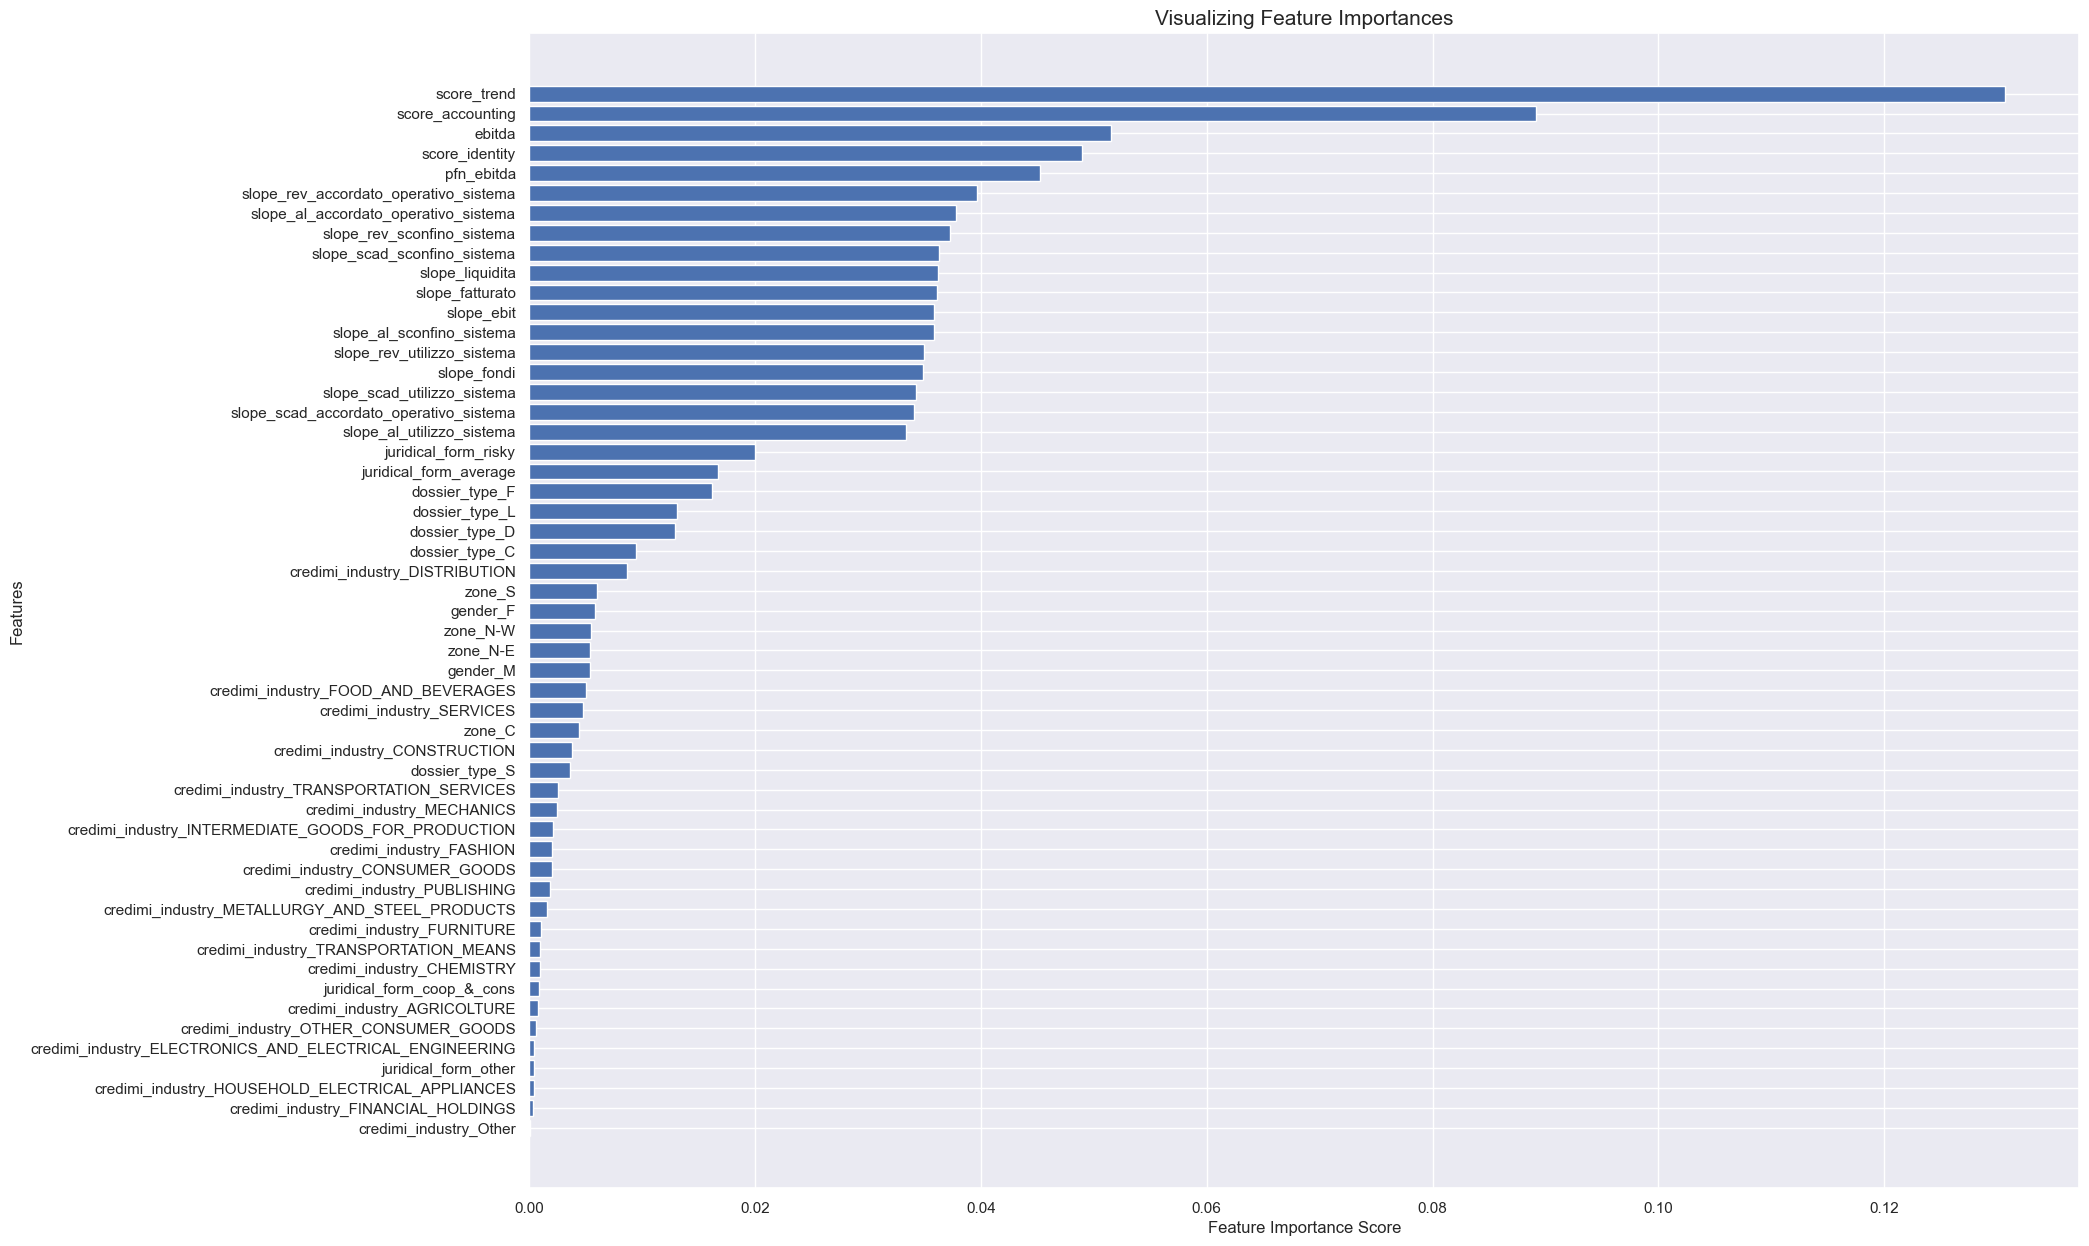

In [37]:
# Making the feature importances plot using "forest" (all features)
plt.figure(figsize = (20, 15))

# Fitting the estimator on the entire training set
forest1.fit(X_train2, y_train)

feature_imp = pd.Series(forest1.feature_importances_, 
                        index = X_train2.columns).sort_values(ascending=True)

plt.barh(feature_imp.index, feature_imp)
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Feature Importances", fontsize=15)

Consistent with the great deterioration obtained by removing "score_trend", here I obtain a very high level of its importance.

In [38]:
from sklearn.utils.validation import check_is_fitted

check_is_fitted(forest1)

In [39]:
# Here I try to improve the performance of the algorithm through
# a technique called "Recursive feature elimination with cross-validation".

from sklearn.feature_selection import RFECV
from sklearn.metrics import average_precision_score


# Save the feature names in a list
lista = list(feature_imp.index)

# Create RFECV instance
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
rfecv = RFECV(estimator = forest1, step = 1, cv = stratified_kfold, scoring = 'f1')

# Fit the RFECV instance on the training data
rfecv.fit(X_train2, y_train)

# Print the optimal number of features
print("Optimal number of features: %d" % rfecv.n_features_)

# Print the selected features
selected_features = [feature for i, feature in enumerate(X_train2.columns) if rfecv.support_[i]]
print("Selected features:", selected_features)

Optimal number of features: 25
Selected features: ['pfn_ebitda', 'ebitda', 'score_accounting', 'score_identity', 'score_trend', 'slope_ebit', 'slope_fondi', 'slope_fatturato', 'slope_liquidita', 'slope_al_accordato_operativo_sistema', 'slope_al_utilizzo_sistema', 'slope_al_sconfino_sistema', 'slope_scad_accordato_operativo_sistema', 'slope_scad_utilizzo_sistema', 'slope_scad_sconfino_sistema', 'slope_rev_accordato_operativo_sistema', 'slope_rev_utilizzo_sistema', 'slope_rev_sconfino_sistema', 'juridical_form_average', 'juridical_form_risky', 'dossier_type_C', 'dossier_type_D', 'dossier_type_F', 'dossier_type_L', 'credimi_industry_DISTRIBUTION']


In [40]:
# Testing the new metrics values
rfe_features = selected_features


# Evaluate the performance of the model using 5-fold stratified cross-validation
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_res6 = cross_validate(forest1, X_train2.loc[:, rfe_features],
                        y_train, cv = stratified_kfold, scoring = ['accuracy', 'precision', 'recall', 'f1'])

# Print results
print("MEAN accuracy score:", np.mean(cv_res6['test_accuracy']))
print('MEAN Precision:', np.mean(cv_res6['test_precision']))
print('MEAN Recall:', np.mean(cv_res6['test_recall']))
print('MEAN F1 score:', np.mean(cv_res6['test_f1']))

MEAN accuracy score: 0.9057315099674568
MEAN Precision: 0.8703605329184212
MEAN Recall: 0.4287994839958074
MEAN F1 score: 0.5743359996728804


It does not look bad! At the cost of loosing a bit of precision, I gained more recall (which, although not my primary goal, was too low).

In [41]:
# Storing this feature selection
X_train_rfe = X_train2.loc[:, rfe_features].copy()

In [42]:
X_train_rfe.shape

(5304, 25)

In [58]:
# Now I perform a Grid Search (hyperparameter tuning with the new 25 features)
from sklearn.model_selection import GridSearchCV

# Reproducibility
np.random.seed(0)

param_grid = {
    'n_estimators': [60, 80, 100, 120, 140],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

# 5-fold stratified cross-validation
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

# GridSearchCV object
grid_search = GridSearchCV(estimator = forest1, param_grid = param_grid, cv = stratified_kfold,
                           scoring = 'average_precision', n_jobs = -1)

# Perform the grid search on my data
grid_search.fit(X_train_rfe, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best hyperparameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 140}
Best accuracy: 0.7127642878481266


In [43]:
# Testing the proposed combination
forest6 = RandomForestClassifier(bootstrap = False, max_depth = 10, max_features = 'sqrt', min_samples_leaf = 2,
                                min_samples_split = 2, n_estimators = 140, random_state = 0)


# Evaluate the performance of the model using 5-fold stratified cross-validation
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_res7 = cross_validate(forest6, X_train_rfe, y_train, cv = stratified_kfold, scoring = ['accuracy', 'precision', 'recall', 'f1'])

# Print results
print("MEAN accuracy score:", np.mean(cv_res7['test_accuracy']))
print('MEAN Precision:', np.mean(cv_res7['test_precision']))
print('MEAN Recall:', np.mean(cv_res7['test_recall']))
print('MEAN F1 score:', np.mean(cv_res7['test_f1']))

MEAN accuracy score: 0.9055430085536962
MEAN Precision: 0.8819616758601805
MEAN Recall: 0.4198984116745949
MEAN F1 score: 0.5687408848375377


I gained even more Recall. This is a model that can be useful in the next analysis.

In [44]:
# Fitting this estimator
forest6.fit(X_train_rfe, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2,
                       n_estimators=140, random_state=0)

In [45]:
# Now I want to test the XGBOOST algorithm (with the original features combination)
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective = 'binary:logistic', random_state = 0)

# Perform stratified cross-validation using cross_validate
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_results = cross_validate(xgb_model, X_train2, y_train, cv = stratified_kfold, scoring = scoring_metrics, return_train_score = False)

# Print results
print("MEAN accuracy score:", np.mean(cv_results['test_accuracy']))
print('MEAN Precision:', np.mean(cv_results['test_precision']))
print('MEAN Recall:', np.mean(cv_results['test_recall']))
print('MEAN F1 score:', np.mean(cv_results['test_f1']))

MEAN accuracy score: 0.9053534401508012
MEAN Precision: 0.7937717290658467
MEAN Recall: 0.4898331048939773
MEAN F1 score: 0.6045182066900889


### Undersampling

Since our target feature is unbalanced, now I want to try to perform an undersampling. I will test different thresholds.

In [46]:
# Re-print the imbalanced classes
dataframe3.target.value_counts()/len(dataframe3)

0.0    0.851862
1.0    0.148138
Name: target, dtype: float64

In [47]:
dataframe3.shape

(7520, 31)

In [48]:
# Here I want to raise the positive class from 15% (current situation) to 35%
dataframe3[dataframe3.target == 1].shape


# 1114/7520 = about 14.81%
# To raise the positive class to 35% I have to reduce the denominator up to 3182
# (there are 6406 observations with a target = 0), so I need 3182-1114 = 2068
# negative observations and all the 1114 positive observations.

# To raise the positive class to 45% I have to reduce the denominator up to 2475,
# so I need 2475-1114 = 1361 negative observations and all the 1114 positive observations.

(1114, 31)

In [49]:
# Storing in 'undersampled_df_1' all the POSITIVE observations
undersampled_df_1 = dataframe3[dataframe3.target == 1]

In [50]:
# Storing in 'undersampled_df_0' all the NEGATIVE observations
undersampled_df_0 = dataframe3[dataframe3.target == 0].reset_index(drop = True).copy()

In [51]:
print(undersampled_df_1.shape)
print(undersampled_df_0.shape)

(1114, 31)
(6406, 31)


In [52]:
# Select 3182 examples from 'undersampled_df_0':
# Generate random indices for row selection
random_indices_35 = np.random.choice(undersampled_df_0.shape[0], 2068, replace = False)

# Select rows using the random indices
undersampled_35 = undersampled_df_0.iloc[random_indices_35, :].copy()

In [53]:
# Select 2475 examples from 'undersampled_df':
# Generate random indices for row selection
random_indices_45 = np.random.choice(undersampled_df_0.shape[0], 1361, replace = False)

# Select rows using the random indices
undersampled_45 = undersampled_df_0.iloc[random_indices_45, :].copy()

In [54]:
concatenated_35 = pd.concat([undersampled_35, undersampled_df_1], verify_integrity = True, ignore_index = True)
concatenated_45 = pd.concat([undersampled_45, undersampled_df_1], verify_integrity = True, ignore_index = True)

In [55]:
# Check the stratification
print(concatenated_35.target.value_counts()/len(concatenated_35))
print(concatenated_45.target.value_counts()/len(concatenated_45))

0.0    0.649906
1.0    0.350094
Name: target, dtype: float64
0.0    0.549899
1.0    0.450101
Name: target, dtype: float64


In [56]:
# Shuffle both datasets
from sklearn.utils import shuffle

concatenated_35 = shuffle(concatenated_35)
concatenated_45 = shuffle(concatenated_45)

In [57]:
concatenated_X_train_35 = concatenated_35.drop(columns = "target")
concatenated_X_train_45 = concatenated_45.drop(columns = "target")

y_35 = concatenated_35.target
y_45 = concatenated_45.target

In [58]:
print(concatenated_X_train_35.shape)
print(concatenated_X_train_45.shape)

print(y_35.shape)
print(y_45.shape)

(3182, 30)
(2475, 30)
(3182,)
(2475,)


In [59]:
# Applying the functions
concatenated_X_train_35 = all_in_one(concatenated_X_train_35, concatenated_X_train_35)
concatenated_X_train_45 = all_in_one(concatenated_X_train_45, concatenated_X_train_45)

In [60]:
# Checking the effectiveness of the function
print(concatenated_X_train_35.shape)
print(concatenated_X_train_45.shape)

(3182, 53)
(2475, 53)


**Testing the undersampling:**

In [61]:
# Test the model on the new dataset: (35%)
U_forest1 = RandomForestClassifier(random_state = 0)

# Evaluate the performance of the model using 5-fold (stratified) cross-validation
# using all (selected) features
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_res_1 = cross_validate(U_forest1, concatenated_X_train_35, y_35, cv = stratified_kfold,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'])

# Print results
print("MEAN accuracy score:", np.mean(cv_res_1['test_accuracy']))
print('MEAN Precision:', np.mean(cv_res_1['test_precision']))
print('MEAN Recall:', np.mean(cv_res_1['test_recall']))
print('MEAN F1 score:', np.mean(cv_res_1['test_f1']))

MEAN accuracy score: 0.8302903744952262
MEAN Precision: 0.8429448302623479
MEAN Recall: 0.6337858037409607
MEAN F1 score: 0.7229777382010176


In [62]:
# Test the model on the new dataset: (45%)
U_forest2 = RandomForestClassifier(random_state = 0)

# Evaluate the performance of the model using 5-fold (stratified) cross-validation
# using all (selected) features
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_res_2 = cross_validate(U_forest2, concatenated_X_train_45, y_45, cv = stratified_kfold,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'])

# Print results
print("MEAN accuracy score:", np.mean(cv_res_2['test_accuracy']))
print('MEAN Precision:', np.mean(cv_res_2['test_precision']))
print('MEAN Recall:', np.mean(cv_res_2['test_recall']))
print('MEAN F1 score:', np.mean(cv_res_2['test_f1']))

MEAN accuracy score: 0.808080808080808
MEAN Precision: 0.8056391706391706
MEAN Recall: 0.7576374580858886
MEAN F1 score: 0.78026985484049


It definitely incresed Recall, but at the same time decreased Accuracy and Precision. Now I try to optimize the model and testing whether it is overfitting.

In [63]:
# Feature importance
U_forest2.fit(concatenated_X_train_45, y_45)

feature_imp = pd.Series(U_forest2.feature_importances_, index = concatenated_X_train_45.columns).sort_values(ascending=True)

# Save the feature names in a list
lista = list(feature_imp.index)

# Create RFECV instance
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
rfecv = RFECV(estimator = U_forest2, step = 1, cv = stratified_kfold, scoring = 'average_precision')    # since f1 score is alredy ok, here I particularly focus on precision

# Fit the RFECV instance on the training data
rfecv.fit(concatenated_X_train_45, y_45)

# Print the optimal number of features
print("Optimal number of features: %d" % rfecv.n_features_)

# Print the selected features
selected_features = [feature for i, feature in enumerate(concatenated_X_train_45.columns) if rfecv.support_[i]]
print("Selected features:", selected_features)


Optimal number of features: 43
Selected features: ['pfn_ebitda', 'ebitda', 'score_accounting', 'score_identity', 'score_trend', 'slope_ebit', 'slope_fondi', 'slope_fatturato', 'slope_liquidita', 'slope_al_accordato_operativo_sistema', 'slope_al_utilizzo_sistema', 'slope_al_sconfino_sistema', 'slope_scad_accordato_operativo_sistema', 'slope_scad_utilizzo_sistema', 'slope_scad_sconfino_sistema', 'slope_rev_accordato_operativo_sistema', 'slope_rev_utilizzo_sistema', 'slope_rev_sconfino_sistema', 'juridical_form_average', 'juridical_form_risky', 'dossier_type_C', 'dossier_type_D', 'dossier_type_F', 'dossier_type_L', 'dossier_type_S', 'zone_C', 'zone_N-E', 'zone_N-W', 'zone_S', 'credimi_industry_CONSTRUCTION', 'credimi_industry_DISTRIBUTION', 'credimi_industry_ELECTRONICS_AND_ELECTRICAL_ENGINEERING', 'credimi_industry_FASHION', 'credimi_industry_FOOD_AND_BEVERAGES', 'credimi_industry_INTERMEDIATE_GOODS_FOR_PRODUCTION', 'credimi_industry_MECHANICS', 'credimi_industry_METALLURGY_AND_STEEL_PRO

In [64]:
# Testing the new metrics values
rfe_features_U = selected_features

# Evaluate the performance of the model using 5-fold stratified cross-validation
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_res_3 = cross_validate(U_forest2, concatenated_X_train_45.loc[:, rfe_features_U],
                        y_45, cv = stratified_kfold, scoring = ['accuracy', 'precision', 'recall', 'f1'])

# Print results
print("MEAN accuracy score:", np.mean(cv_res_3['test_accuracy']))
print('MEAN Precision:', np.mean(cv_res_3['test_precision']))
print('MEAN Recall:', np.mean(cv_res_3['test_recall']))
print('MEAN F1 score:', np.mean(cv_res_3['test_f1']))

MEAN accuracy score: 0.823030303030303
MEAN Precision: 0.8285933782422157
MEAN Recall: 0.7675150486809679
MEAN F1 score: 0.7956054513832499


It slightly improved all metrics.

In [195]:
# Now I perform a Grid Search (hyperparameter tuning with the new 50 features)

# Reproducibility
np.random.seed(0)

param_grid = {
    'n_estimators': [60, 80, 100, 120, 140],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

# 5-fold stratified cross-validation
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

# GridSearchCV object
grid_search = GridSearchCV(estimator = U_forest2, param_grid = param_grid, cv = stratified_kfold,
                           scoring = 'average_precision', n_jobs = -1)

# Perform the grid search on my data
grid_search.fit(concatenated_X_train_45.loc[:, rfe_features_U], y_45)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best hyperparameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 140}
Best accuracy: 0.890486437048646


In [65]:
# Testing this hyperparameter tuning combination:
U_forest3 = RandomForestClassifier(n_estimators = 140, max_depth = 10, min_samples_split = 2,
                                   min_samples_leaf = 1, max_features = 'sqrt', bootstrap = False,
                                   random_state = 0)

# Evaluate the performance of the model using 5-fold stratified cross-validation
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_res_4 = cross_validate(U_forest3, concatenated_X_train_45.loc[:, rfe_features_U],
                        y_45, cv = stratified_kfold, scoring = ['accuracy', 'precision', 'recall', 'f1'])

# Print results
print("MEAN accuracy score:", np.mean(cv_res_4['test_accuracy']))
print('MEAN Precision:', np.mean(cv_res_4['test_precision']))
print('MEAN Recall:', np.mean(cv_res_4['test_recall']))
print('MEAN F1 score:', np.mean(cv_res_4['test_f1']))


# No statistically significant variation

MEAN accuracy score: 0.823030303030303
MEAN Precision: 0.8301054518974607
MEAN Recall: 0.76571728679352
MEAN F1 score: 0.7955650406287316


In [ ]:
# Now I want to test this model, trained on the undersampled dataset, to the validation set

In [66]:
U_forest3.fit(concatenated_X_train_45.loc[:, rfe_features_U], y_45)

RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=140,
                       random_state=0)

# Testing on validation set

In [67]:
X_val2 = X_val.copy()

In [68]:
# Apply the all-in-one function on the validation data
X_val2 = all_in_one(X_val2, X_val2)

In [69]:
X_val2.isnull().sum()

pfn_ebitda                                                 0
ebitda                                                     0
score_accounting                                           0
score_identity                                             0
score_trend                                                0
slope_ebit                                                 0
slope_fondi                                                0
slope_fatturato                                            0
slope_liquidita                                            0
slope_al_accordato_operativo_sistema                       0
slope_al_utilizzo_sistema                                  0
slope_al_sconfino_sistema                                  0
slope_scad_accordato_operativo_sistema                     0
slope_scad_utilizzo_sistema                                0
slope_scad_sconfino_sistema                                0
slope_rev_accordato_operativo_sistema                      0
slope_rev_utilizzo_siste

In [70]:
X_val2.shape

(937, 52)

In [71]:
# In this validation set there are no obeservations with "credimi_industry_Other",
# so I add this feature and fill with 0s.
pos = X_train2.columns.get_loc('credimi_industry_Other')
X_val2.insert(pos, 'credimi_industry_Other', 0)

In [72]:
# Check if everything is all right
X_val2.shape

(937, 53)

In [73]:
# Create X_val_rfe
X_val_rfe = X_val2.loc[:, rfe_features].copy()

In [74]:
X_val_rfe.shape

(937, 25)

In [75]:
# On validation test
y_val_pred = forest6.predict(X_val_rfe)

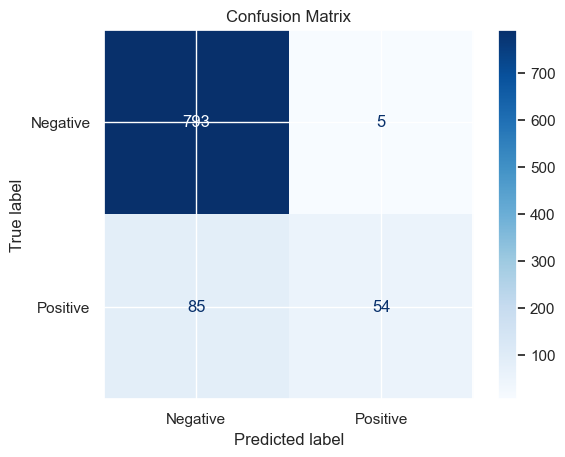

In [76]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_val, y_val_pred)


# Display the confusion matrix
classes = ['Negative', 'Positive']
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)

disp.plot(cmap = 'Blues')
plt.title('Confusion Matrix')
plt.show()

In [77]:
# forest1: (no feature selection)
y_val_pred1 = forest1.predict(X_val2)

In [78]:
# Use the fitted algorithm to predict the outcome:
y_val_pred6 = forest6.predict(X_val_rfe)

In [80]:
# Validation with forest1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy1 = accuracy_score(y_val, y_val_pred1)
precision1 = precision_score(y_val, y_val_pred1)
recall1 = recall_score(y_val, y_val_pred1)
f1_score1 = f1_score(y_val, y_val_pred1)

print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 score:", f1_score1)

Accuracy: 0.9050160085378869
Precision: 0.9310344827586207
Recall: 0.38848920863309355
F1 score: 0.5482233502538071


In [81]:
# Validation with forest6
accuracy6 = accuracy_score(y_val, y_val_pred6)
precision6 = precision_score(y_val, y_val_pred6)
recall6 = recall_score(y_val, y_val_pred6)
f1_score6 = f1_score(y_val, y_val_pred6)

print("Accuracy:", accuracy6)
print("Precision:", precision6)
print("Recall:", recall6)
print("F1 score:", f1_score6)

Accuracy: 0.9039487726787621
Precision: 0.9152542372881356
Recall: 0.38848920863309355
F1 score: 0.5454545454545455


The result are consistent with the training set. The model is not overfitting so. However, forest1 (no feature selection) performed better than forest6 (feature selection + grid search).


Now I test the model trained with the **undersampled** dataset.

In [85]:
# U_forest2: (no feature selection)
y_val_pred_U1 = U_forest2.predict(X_val2)

In [86]:
# U_forest3: (feature selection and grid search)
y_val_pred_U2 = U_forest3.predict(X_val2.loc[:, rfe_features_U])

In [87]:
U_accuracy1 = accuracy_score(y_val, y_val_pred_U1)
U_precision1 = precision_score(y_val, y_val_pred_U1)
U_recall1 = recall_score(y_val, y_val_pred_U1)
U_f1_score1 = f1_score(y_val, y_val_pred_U1)

print("Accuracy:", U_accuracy1)
print("Precision:", U_precision1)
print("Recall:", U_recall1)
print("F1 score:", U_f1_score1)

Accuracy: 0.9124866595517609
Precision: 0.6301369863013698
Recall: 0.9928057553956835
F1 score: 0.7709497206703911


In [88]:
U_accuracy2 = accuracy_score(y_val, y_val_pred_U2)
U_precision2 = precision_score(y_val, y_val_pred_U2)
U_recall2 = recall_score(y_val, y_val_pred_U2)
U_f1_score2 = f1_score(y_val, y_val_pred_U2)

print("Accuracy:", U_accuracy2)
print("Precision:", U_precision2)
print("Recall:", U_recall2)
print("F1 score:", U_f1_score2)

Accuracy: 0.8975453575240128
Precision: 0.6018957345971564
Recall: 0.9136690647482014
F1 score: 0.7257142857142858


#### Testing the thresholds with the Precision-Recall Curve

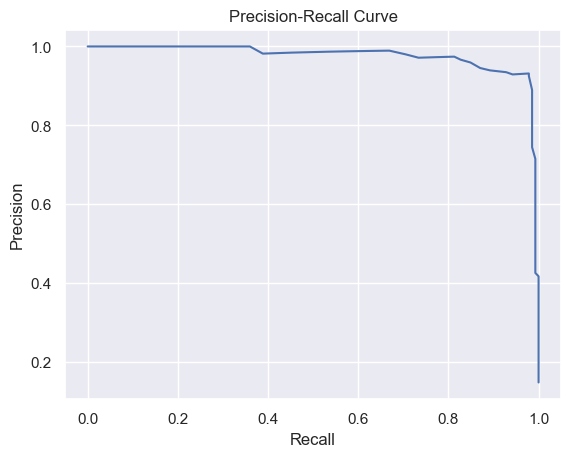

In [91]:
# TESTING THRESHOLDS WITH U_forest2
from sklearn.metrics import precision_recall_curve

# Get the predicted probabilities for the validation set
y_pred_proba = U_forest2.predict_proba(X_val2)

# Calculate the precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba[:, 1])

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [105]:
# Get predicted probabilities for class 1 from the classifier
y_pred_proba_class1 = U_forest2.predict_proba(X_val2)[:, 1]  # Probabilities for class 1

custom_threshold = 0.8
y_pred_custom1 = (y_pred_proba_class1 >= custom_threshold).astype(int)

# Calculate metrics using the custom threshold predictions
accuracy = accuracy_score(y_val, y_pred_custom1)
print("Accuracy with custom threshold:", accuracy)

precision = precision_score(y_val, y_pred_custom1)
print("Precision with custom threshold:", precision)

recall = recall_score(y_val, y_pred_custom1)
print("Recall with custom threshold:", recall)

Accuracy with custom threshold: 0.9658484525080042
Precision with custom threshold: 0.9734513274336283
Recall with custom threshold: 0.7913669064748201


It definitely increased Precision, even though it decreased recall. But I find it the right trade-off.

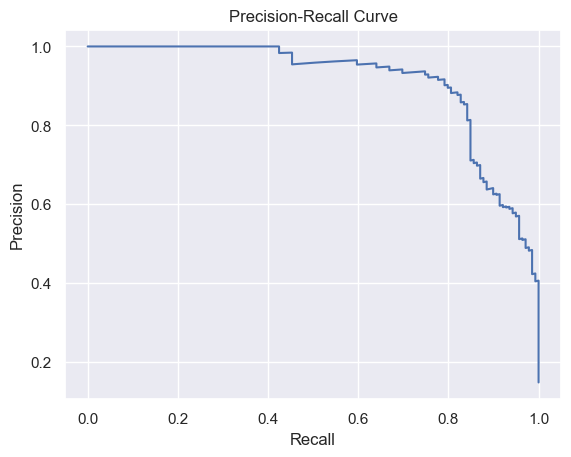

In [101]:
# Get the predicted probabilities for the testing set
y_pred_proba2 = U_forest3.predict_proba(X_val2.loc[:, rfe_features_U])

# Calculate the precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba2[:, 1])

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [106]:
# Get predicted probabilities for class 1 from the classifier
y_pred_proba_class1 = U_forest3.predict_proba(X_val2.loc[:, rfe_features_U])[:, 1]  # Probabilities for class 1

custom_threshold = 0.75
y_pred_custom2 = (y_pred_proba_class1 >= custom_threshold).astype(int)

# Calculate metrics using the custom threshold predictions
accuracy = accuracy_score(y_val, y_pred_custom2)
print("Accuracy with custom threshold:", accuracy)

precision = precision_score(y_val, y_pred_custom2)
print("Precision with custom threshold:", precision)

recall = recall_score(y_val, y_pred_custom2)
print("Recall with custom threshold:", recall)

Accuracy with custom threshold: 0.9402347918890075
Precision with custom threshold: 0.9560439560439561
Recall with custom threshold: 0.6258992805755396


**Same thing with the non-undersampled trained algorithms:**

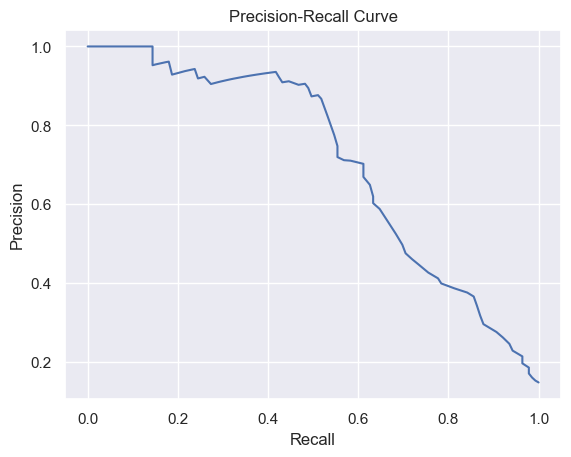

In [107]:
# Get the predicted probabilities for the testing set
y_pred_proba3 = forest1.predict_proba(X_val2)

# Calculate the precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba3[:, 1])

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

It actually does not have much room for improvement...

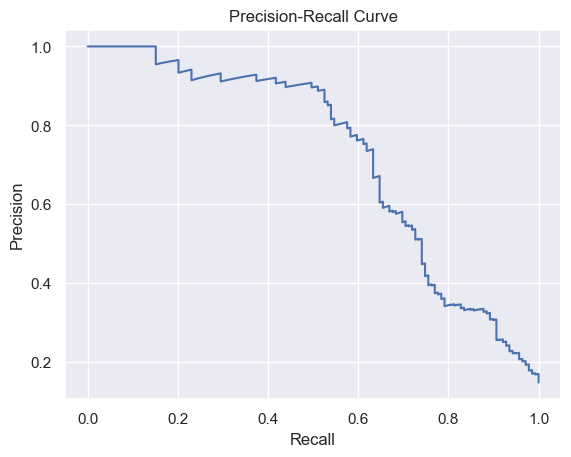

In [110]:
# Get the predicted probabilities for the testing set
y_pred_proba4 = forest6.predict_proba(X_val_rfe)

# Calculate the precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba4[:, 1])

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Same thing here...

In [ ]:
# So, for now the undersampling seems to be the best choice. Specifically, U_forest2 (no feature selection)

# Testing on the test set

In [112]:
# Make a copy to work with
X_test2 = X_test.copy()

In [113]:
# Apply tge all_in_one function
X_test2 = all_in_one(X_test2, X_test2)

In [114]:
# Testing if there are null values
X_test2.isnull().sum()

pfn_ebitda                                                 0
ebitda                                                     0
score_accounting                                           0
score_identity                                             0
score_trend                                                0
slope_ebit                                                 0
slope_fondi                                                0
slope_fatturato                                            0
slope_liquidita                                            0
slope_al_accordato_operativo_sistema                       0
slope_al_utilizzo_sistema                                  0
slope_al_sconfino_sistema                                  0
slope_scad_accordato_operativo_sistema                     0
slope_scad_utilizzo_sistema                                0
slope_scad_sconfino_sistema                                0
slope_rev_accordato_operativo_sistema                      0
slope_rev_utilizzo_siste

In [115]:
# Testing the shape
X_test2.shape

(1279, 53)

In [117]:
# Getting predicted probabilities for class 1 from the classifier
y_pred_proba_class1_final = U_forest2.predict_proba(X_test2)[:, 1]  # Probabilities for class 1

# Applying the threshold
custom_threshold = 0.8
y_pred_custom_final = (y_pred_proba_class1_final >= custom_threshold).astype(int)

# Calculate metrics using the custom threshold predictions
accuracy = accuracy_score(y_test, y_pred_custom_final)
print("Accuracy with custom threshold:", accuracy)

precision = precision_score(y_test, y_pred_custom_final)
print("Precision with custom threshold:", precision)

recall = recall_score(y_test, y_pred_custom_final)
print("Recall with custom threshold:", recall)

Accuracy with custom threshold: 0.965598123534011
Precision with custom threshold: 0.9617834394904459
Recall with custom threshold: 0.798941798941799


The model is not overfitting.

# Uploading the TEST SET (test.csv)

In [118]:
# Fixing columns and rows
def fixing_col_row2(df):
    
    # FIXING COLUMNS:
    columns = 'sfid|dt_rif|juridical_form|dossier_type|application_source|credimi_industry|region|zone|revenues|pfn_ebitda|pn|ebitda|score_accounting|score_identity|score_trend|slope_ebit|slope_fondi|slope_ebitda|slope_fatturato|slope_liquidita|slope_al_accordato_operativo_sistema|slope_al_utilizzo_sistema|slope_al_sconfino_sistema|slope_scad_accordato_operativo_sistema|slope_scad_utilizzo_sistema|slope_scad_sconfino_sistema|slope_rev_accordato_operativo_sistema|slope_rev_utilizzo_sistema|slope_rev_sconfino_sistema|gender'
    sep = columns.split("|")

    i = 1
    while i < len(sep):
        support = sep[i]
        df.insert(i, support, np.nan)
        i += 1

    # First column rename
    df.rename(columns = {'sfid|dt_rif|juridical_form|dossier_type|application_source|credimi_industry|region|zone|revenues|pfn_ebitda|pn|ebitda|score_accounting|score_identity|score_trend|slope_ebit|slope_fondi|slope_ebitda|slope_fatturato|slope_liquidita|slope_al_accordato_operativo_sistema|slope_al_utilizzo_sistema|slope_al_sconfino_sistema|slope_scad_accordato_operativo_sistema|slope_scad_utilizzo_sistema|slope_scad_sconfino_sistema|slope_rev_accordato_operativo_sistema|slope_rev_utilizzo_sistema|slope_rev_sconfino_sistema|gender': 'sfid'}, inplace = True)
    
    #
    #
    #
    #
    
    # FIXING ROWS:
    sep2 = df.iloc[0, 0].split("|")
    i = 0
    j = 1
    while i < len(df):
        sep2 = df.iloc[i, 0].split("|")
        while j < len(df.columns):
            if sep2[j] != '':
                df.iloc[i, j] = sep2[j]
                j += 1
            else:
                df.iloc[i, j] = np.nan
                j += 1
        df.iloc[i, 0] = sep2[0]
        i += 1
        j = 1
    

    return df

In [119]:
# Upload the dataset
test = pd.read_csv("test.csv")
test

sfid|dt_rif|juridical_form|dossier_type|application_source|credimi_industry|region|zone|revenues|pfn_ebitda|pn|ebitda|score_accounting|score_identity|score_trend|slope_ebit|slope_fondi|slope_ebitda|slope_fatturato|slope_liquidita|slope_al_accordato_operativo_sistema|slope_al_utilizzo_sistema|slope_al_sconfino_sistema|slope_scad_accordato_operativo_sistema|slope_scad_utilizzo_sistema|slope_scad_sconfino_sistema|slope_rev_accordato_operativo_sistema|slope_rev_utilizzo_sistema|slope_rev_sconfino_sistema|gender
0     a1Q2X00000XcAcwUAF|2020-02-06|SR|D|D|PUBLISHIN...                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
1     a1Q7R00000ZWGilUAH|2020-10-21|SR|F|D|DISTRIBUT...                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
2     a1Q2X00000XcXBUUA3|2020-03-06|SP|D|R|SERVICES|...                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
3     a1Q7R00000a3GGvUAM|2021-07-13|SR|F|R|SERVICES|...                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
4     a1Q7R00000ZWWU5UAP|2021-02-24|AS|F|R|SERVICES|...                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
...                                                 ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
1875  a1Q7R00000eiWz5UAE|2021-10-05|DI|C|D|FOOD_AND_...                                                                                                                                                                                                                                                                                                                                    

In [120]:
# Make a copy
test2 = test.copy()

In [121]:
# Applying the fixing_col_row2 function
test2 = fixing_col_row2(test2)

In [122]:
test2

sfid      dt_rif juridical_form dossier_type  \
0     a1Q2X00000XcAcwUAF  2020-02-06             SR            D   
1     a1Q7R00000ZWGilUAH  2020-10-21             SR            F   
2     a1Q2X00000XcXBUUA3  2020-03-06             SP            D   
3     a1Q7R00000a3GGvUAM  2021-07-13             SR            F   
4     a1Q7R00000ZWWU5UAP  2021-02-24             AS            F   
...                  ...         ...            ...          ...   
1875  a1Q7R00000eiWz5UAE  2021-10-05             DI            C   
1876  a1Q2X00000ZAQC1UAP  2020-03-20             RS            S   
1877  a1Q2X00000Xc3fGUAR  2020-02-18             SR            D   
1878  a1Q7R00000eiZYRUA2  2021-10-19             SR            F   
1879  a1Q7R00000ejTXLUA2  2022-01-20             SR            F   

     application_source    credimi_industry     region zone revenues  \
0                     D          PUBLISHING  LOMBARDIA  N-W   1618.0   
1                     D        DISTRIBUTION     VENETO  N-E    400.0   
2                     R            SERVICES  LOMBARDIA  N-W   9053.0   
3                     R            SERVICES   PIEMONTE  N-W   1759.0   
4                     R            SERVICES  LOMBARDIA  N-W      NaN   
...                 ...                 ...        ...  ...      ...   
1875                  D  FOOD_AND_BEVERAGES    SICILIA    I      NaN   
1876                  R        CONSTRUCTION    SICILIA    I      NaN   
1877                  -           MECHANICS  LOMBARDIA  N-W   3812.0   
1878                  R           FURNITURE  LOMBARDIA  N-W   2327.0   
1879                  D            SERVICES   PIEMONTE  N-W      NaN   

     pfn_ebitda      pn  ebitda      score_accounting       score_identity  \
0        -2.726   103.0   186.0  -0.16153779354770337         -2.517342357   
1       -0.9091    27.0    22.0   -0.9841138346437599          -2.42410633   
2         1.154  1638.0  4839.0      -1.0699389058866         -2.270403321   
3          22.1   285.0    70.0   -0.9567964239522528         -2.270403321   
4           NaN     NaN     NaN  -0.16153779354770337         -1.665355161   
...         ...     ...     ...                   ...                  ...   
1875        NaN     NaN     NaN  -0.16153779354770337         -0.338883303   
1876        NaN     NaN     NaN  -0.16153779354770337  -0.4183216660000001   
1877      1.294   511.0   806.0     -1.22282194573522         -2.351035705   
1878      3.175   615.0   418.0   -1.1771719701057382         -2.085951391   
1879        NaN     NaN     NaN  -0.16153779354770337         -2.024466101   

              score_trend          slope_ebit          slope_fondi  \
0                   -1.55  1.0349689603174648   -7.483734717903028   
1                    -2.2    8.54095184209955   0.6121723953455511   
2                     0.4  -8.244712649435598   -7.929971208497657   
3                    -2.2                 6.0                  0.0   
4                    -3.0  2.4171446892892345  -15.462984598152973   
...                   ...                 ...                  ...   
1875                  0.1  2.0687000181450217   2.3973914664744855   
1876                  0.1   2.902761462365552  -15.547866319832755   
1877  -0.7000000000000001               142.0                 -2.0   
1878                  0.5   4.933200935417203  -6.6219556648330435   
1879                 0.35  -5.216575374470232   -9.750449076155354   

             slope_ebitda     slope_fatturato      slope_liquidita  \
0      -2.113533448705182  146.31883886733777   19.900210613666637   
1       20.22552598783318  140.55868020860632   17.044838966527887   
2         9.5830583416762  143.47109182691895    20.74864853567901   
3                     7.0               233.0                 11.0   
4      16.614470880757473  162.02891122864125   27.941488872513176   
...                   ...                 ...                  ...   
1875   11.514598493053771  163.47083724162584     7.24367524126168   


In [123]:
# Cleaning data types
def data_types_cleaning2(df):
    df.revenues = df.revenues.astype(float).round(3)
    df.pfn_ebitda = df.pfn_ebitda.astype(float).round(3)
    df.pn = df.pn.astype(float).round(3)
    df.ebitda = df.ebitda.astype(float).round(3)
    #df.target = df.target.astype(float).round(3)
    df.score_accounting = df.score_accounting.astype(float).round(3)
    df.score_identity = df.score_identity.astype(float).round(3)
    df.score_trend = df.score_trend.astype(float).round(3)
    df.slope_ebit = df.slope_ebit.astype(float).round(3)
    df.slope_fondi = df.slope_fondi.astype(float).round(3)
    df.slope_ebitda = df.slope_ebitda.astype(float).round(3)
    df.slope_fatturato = df.slope_fatturato.astype(float).round(3)
    df.slope_liquidita = df.slope_liquidita.astype(float).round(3)
    df.slope_al_accordato_operativo_sistema = df.slope_al_accordato_operativo_sistema.astype(float).round(3)
    df.slope_al_utilizzo_sistema = df.slope_al_utilizzo_sistema.astype(float).round(3)
    df.slope_al_sconfino_sistema = df.slope_al_sconfino_sistema.astype(float).round(3)
    df.slope_scad_accordato_operativo_sistema = df.slope_scad_accordato_operativo_sistema.astype(float).round(3)
    df.slope_scad_utilizzo_sistema = df.slope_scad_utilizzo_sistema.astype(float).round(3)
    df.slope_scad_sconfino_sistema = df.slope_scad_sconfino_sistema.astype(float).round(3)
    df.slope_rev_accordato_operativo_sistema = df.slope_rev_accordato_operativo_sistema.astype(float).round(3)
    df.slope_rev_utilizzo_sistema = df.slope_rev_utilizzo_sistema.astype(float).round(3)
    df.slope_rev_sconfino_sistema = df.slope_rev_sconfino_sistema.astype(float).round(3)

    return df 

test2 = data_types_cleaning2(test2)

In [124]:
# all_in_one function
test2 = all_in_one(test2, test2)

In [125]:
# Testing null values
test2.isnull().sum()

pfn_ebitda                                                 0
ebitda                                                     0
score_accounting                                           0
score_identity                                             0
score_trend                                                0
slope_ebit                                                 0
slope_fondi                                                0
slope_fatturato                                            0
slope_liquidita                                            0
slope_al_accordato_operativo_sistema                       0
slope_al_utilizzo_sistema                                  0
slope_al_sconfino_sistema                                  0
slope_scad_accordato_operativo_sistema                     0
slope_scad_utilizzo_sistema                                0
slope_scad_sconfino_sistema                                0
slope_rev_accordato_operativo_sistema                      0
slope_rev_utilizzo_siste

In [127]:
# Testing the shape
test2.shape

(1880, 53)

In [126]:
test2

pfn_ebitda  ebitda  score_accounting  score_identity  score_trend  \
0        -2.7260   186.0            -0.162          -2.517         -1.8   
1        -0.9090    22.0            -0.984          -2.424         -1.8   
2         1.1540  4839.0            -1.070          -2.270          0.2   
3        22.1000    70.0            -0.957          -2.270         -1.8   
4        -0.1645    53.0            -0.162          -1.665         -2.8   
...          ...     ...               ...             ...          ...   
1875     -0.0225    57.0            -0.162          -0.339          0.2   
1876     -0.1880    61.0            -0.162          -0.418          0.2   
1877      1.2940   806.0            -1.223          -2.351         -0.9   
1878      3.1750   418.0            -1.177          -2.086          0.2   
1879     -0.1645    53.0            -0.162          -2.024          0.2   

      slope_ebit  slope_fondi  slope_fatturato  slope_liquidita  \
0          1.035       -7.484          146.319           19.900   
1          8.541        0.612          140.559           17.045   
2         -8.245       -7.930          143.471           20.749   
3          6.000        0.000          233.000           11.000   
4          2.417      -15.463          162.029           27.941   
...          ...          ...              ...              ...   
1875       2.069        2.397          163.471            7.244   
1876       2.903      -15.548          158.046           13.518   
1877       4.500       -2.000          143.000          -12.500   
1878       4.933       -6.622          134.523           -1.223   
1879      -5.217       -9.750          133.665           11.636   

      slope_al_accordato_operativo_sistema  slope_al_utilizzo_sistema  \
0                                    2.100                      1.192   
1                                    6.009                     11.915   
2                                   13.281                    -13.487   
3                                    5.809                     -6.132   
4                                  -13.146                      8.422   
...                                    ...                        ...   
1875                                 7.137                     -4.841   
1876                                 7.562                    -10.533   
1877                                 1.146                    -15.109   
1878                                -7.741                     14.535   
1879                                -8.412                      7.086   

      slope_al_sconfino_sistema  slope_scad_accordato_operativo_sistema  \
0                       -12.092                                 -13.987   
1                         8.694                                  -0.720   
2                       -11.603                                   6.584   
3                         2.722                                   8.745   
4                         2.112                                  -1.209   
...                         ...                                     ...   
1875                     -1.158                                  -6.481   
1876                      4.413                                 -24.548   
1877                     -1.000                                  -1.035   
1878                     14.013                                  -1.481   
1879                    -14.621                                  12.237   

      slope_scad_utilizzo_sistema  slope_scad_sconfino_sistema  \
0                          -5.126                        3.066   
1                         -11.443                       -0.443   
2                          -6.162                       15.846   
3                          -3.303                       14.459   
4                           5.145                        7.104   
...                           ...                          ...   
1875                      -11.159                        1.4

In [130]:
# Predictions with U_forest2 with the data it has seen in the "training set":

# Get predicted probabilities for class 1 from the classifier
y_pred_proba_class1_final_test = U_forest2.predict_proba(test2)[:, 1]  # Probabilities for class 1

# Apply the custom threshold to make binary predictions on the test set
custom_threshold = 0.8
y_pred_custom_final_test = (y_pred_proba_class1_final_test >= custom_threshold).astype(int)

# Create a DataFrame with predictions and store them to a CSV file
result_df = pd.DataFrame({'Predicted_target': y_pred_custom_final_test})
result_df.to_csv('rating_score_results_final.csv', index = False)